# IMPORT LIBRARY

In [55]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns 
import math


# IMPORT MODEL

In [56]:
from FFNN_basic_class import Layer, FFNN

# LOAD DATA

In [57]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)

In [58]:
X.shape

(70000, 784)

In [59]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, train_size=65000, test_size=5000, stratify=y, random_state=42)

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, train_size=0.8, stratify=y_train_full, random_state=42)

In [61]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# MODEL TESTING

## Test Class Layer and FFNN

In [62]:
model_ffnn = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=20,
    verbose=1
)

In [63]:
model_ffnn.build_layers(
    Layer(n_neurons=2, init='zero', activation='linear'),
    Layer(n_neurons=2, init='uniform', activation='relu', init_params={'lower': -0.5, 'upper': 0.5}),
    Layer(n_neurons=2, init='normal', activation='tanh', init_params={'mean': 0, 'variance': 0.01}),
    Layer(n_neurons=2, init='xavier_normal', activation='softmax'),
    Layer(n_neurons=2, init='xavier_uniform', activation='leaky_relu'),
    Layer(n_neurons=2, init='he_normal', activation='elu'),
    Layer(n_neurons=10, init='he_uniform', activation='sigmoid')
)

In [64]:
model_ffnn.fit(X_train, y_train)

Epoch 1/20: 100%|██████████| 52000/52000 [00:00<00:00, 103491.17sample/s]


Epoch 1/20 - Train Loss: 0.2382, Val Loss: 0.2382


Epoch 2/20: 100%|██████████| 52000/52000 [00:00<00:00, 93319.94sample/s]


Epoch 2/20 - Train Loss: 0.2357, Val Loss: 0.2358


Epoch 3/20: 100%|██████████| 52000/52000 [00:00<00:00, 94683.45sample/s] 


Epoch 3/20 - Train Loss: 0.2334, Val Loss: 0.2335


Epoch 4/20: 100%|██████████| 52000/52000 [00:00<00:00, 96567.94sample/s] 


KeyboardInterrupt: 

In [ ]:
y_pred = model_ffnn.predict(X_test)
for h in y_pred:
    max_index = np.argmax(h)
    print(max_index)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


## Test Load and Save

In [ ]:
model_ffnn.save('model_ffnn.pkl')

Model saved to model_ffnn.pkl


In [ ]:
loaded_model = FFNN.load('model_ffnn.pkl')

Model loaded from model_ffnn.pkl


In [ ]:
y_pred = loaded_model.predict(X_test)
for h in y_pred:
    max_index = np.argmax(h)
    print(max_index)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
y_test

array([2, 9, 0, ..., 4, 7, 7], dtype=uint8)

## Test Visualization

In [ ]:
# loaded_model.visualize_architecture()

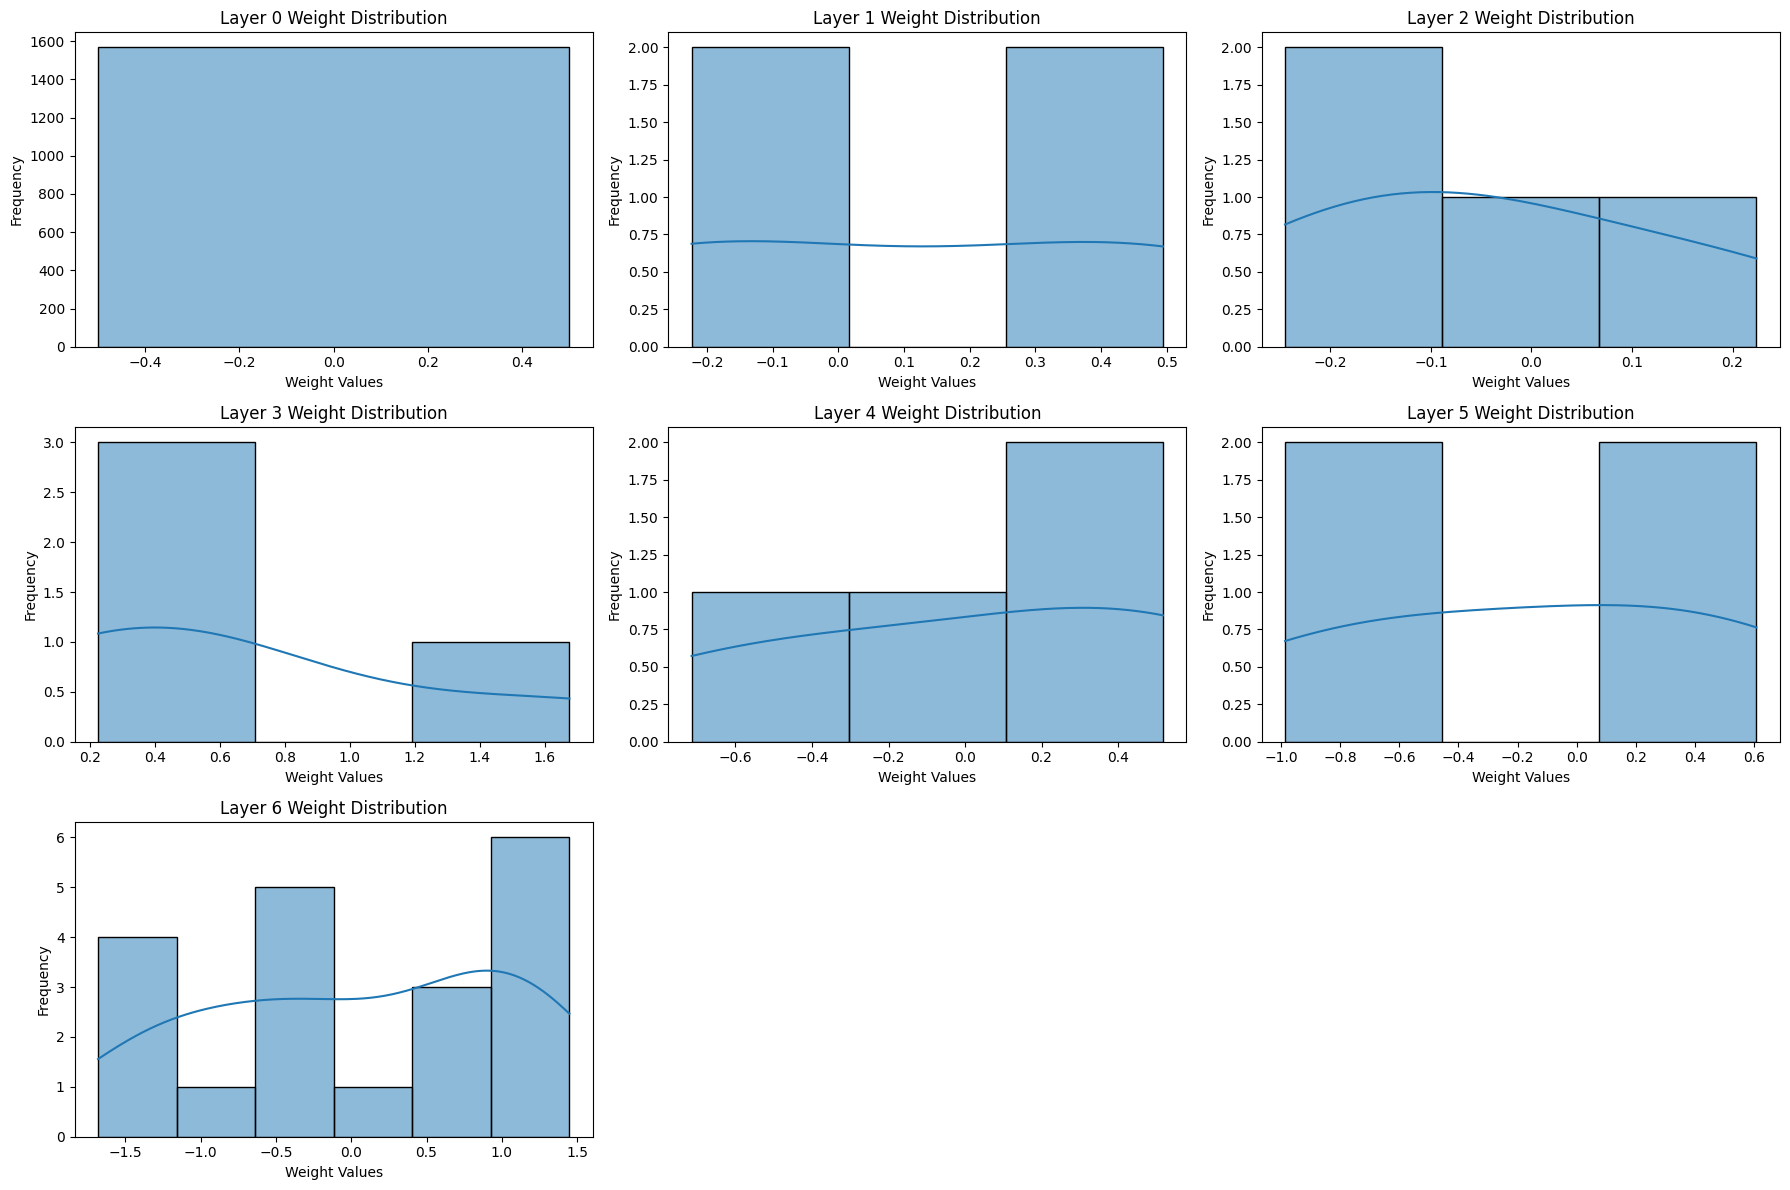

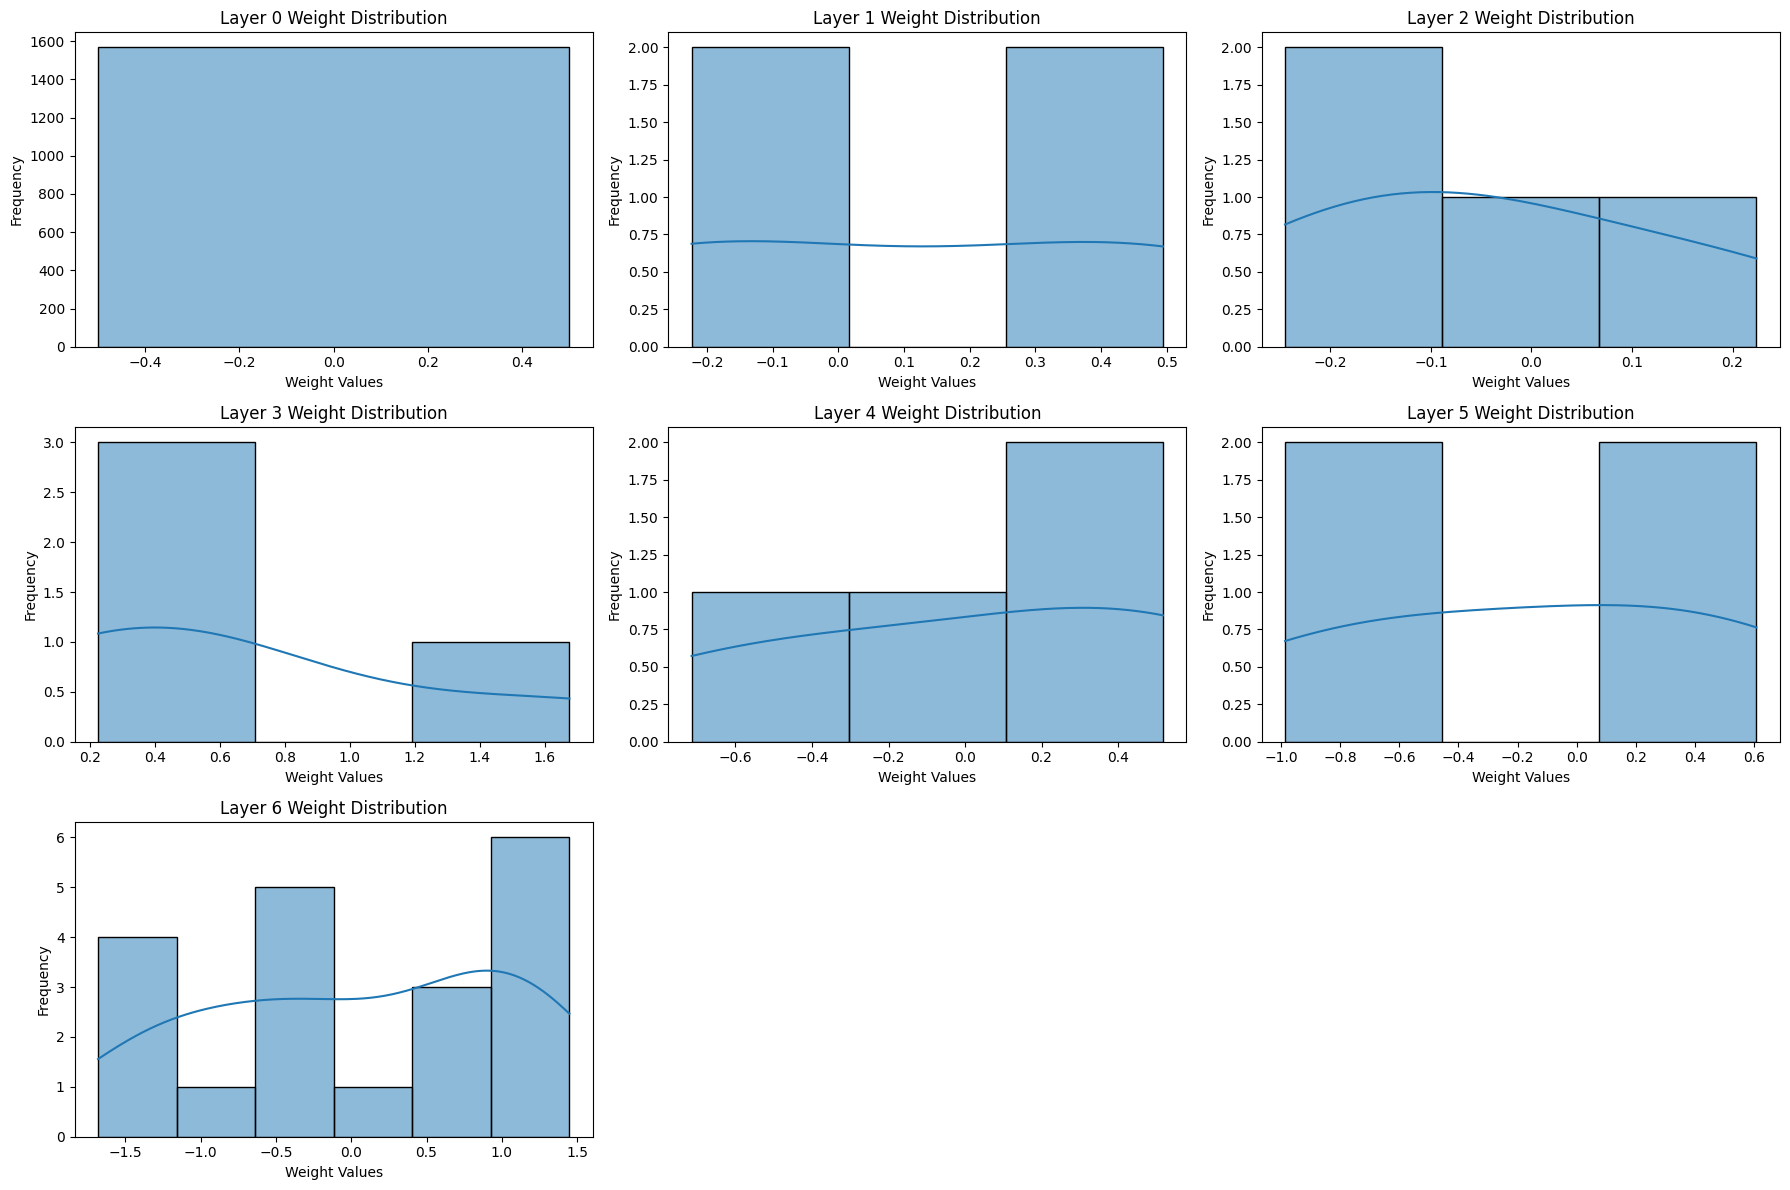

In [ ]:
loaded_model.plot_weight_distribution()

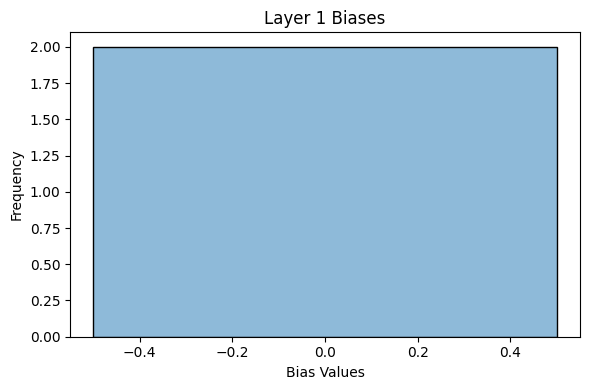

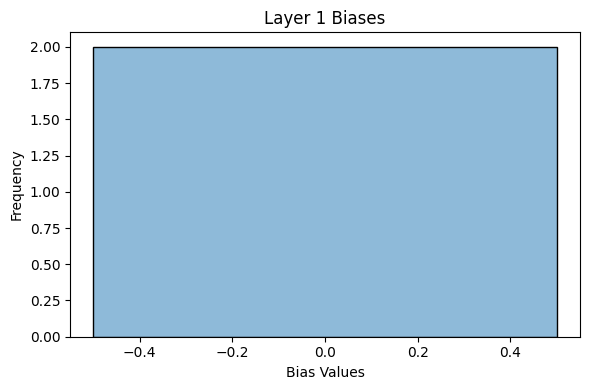

In [ ]:
loaded_model.plot_biases_distribution(layers_to_plot=[1])

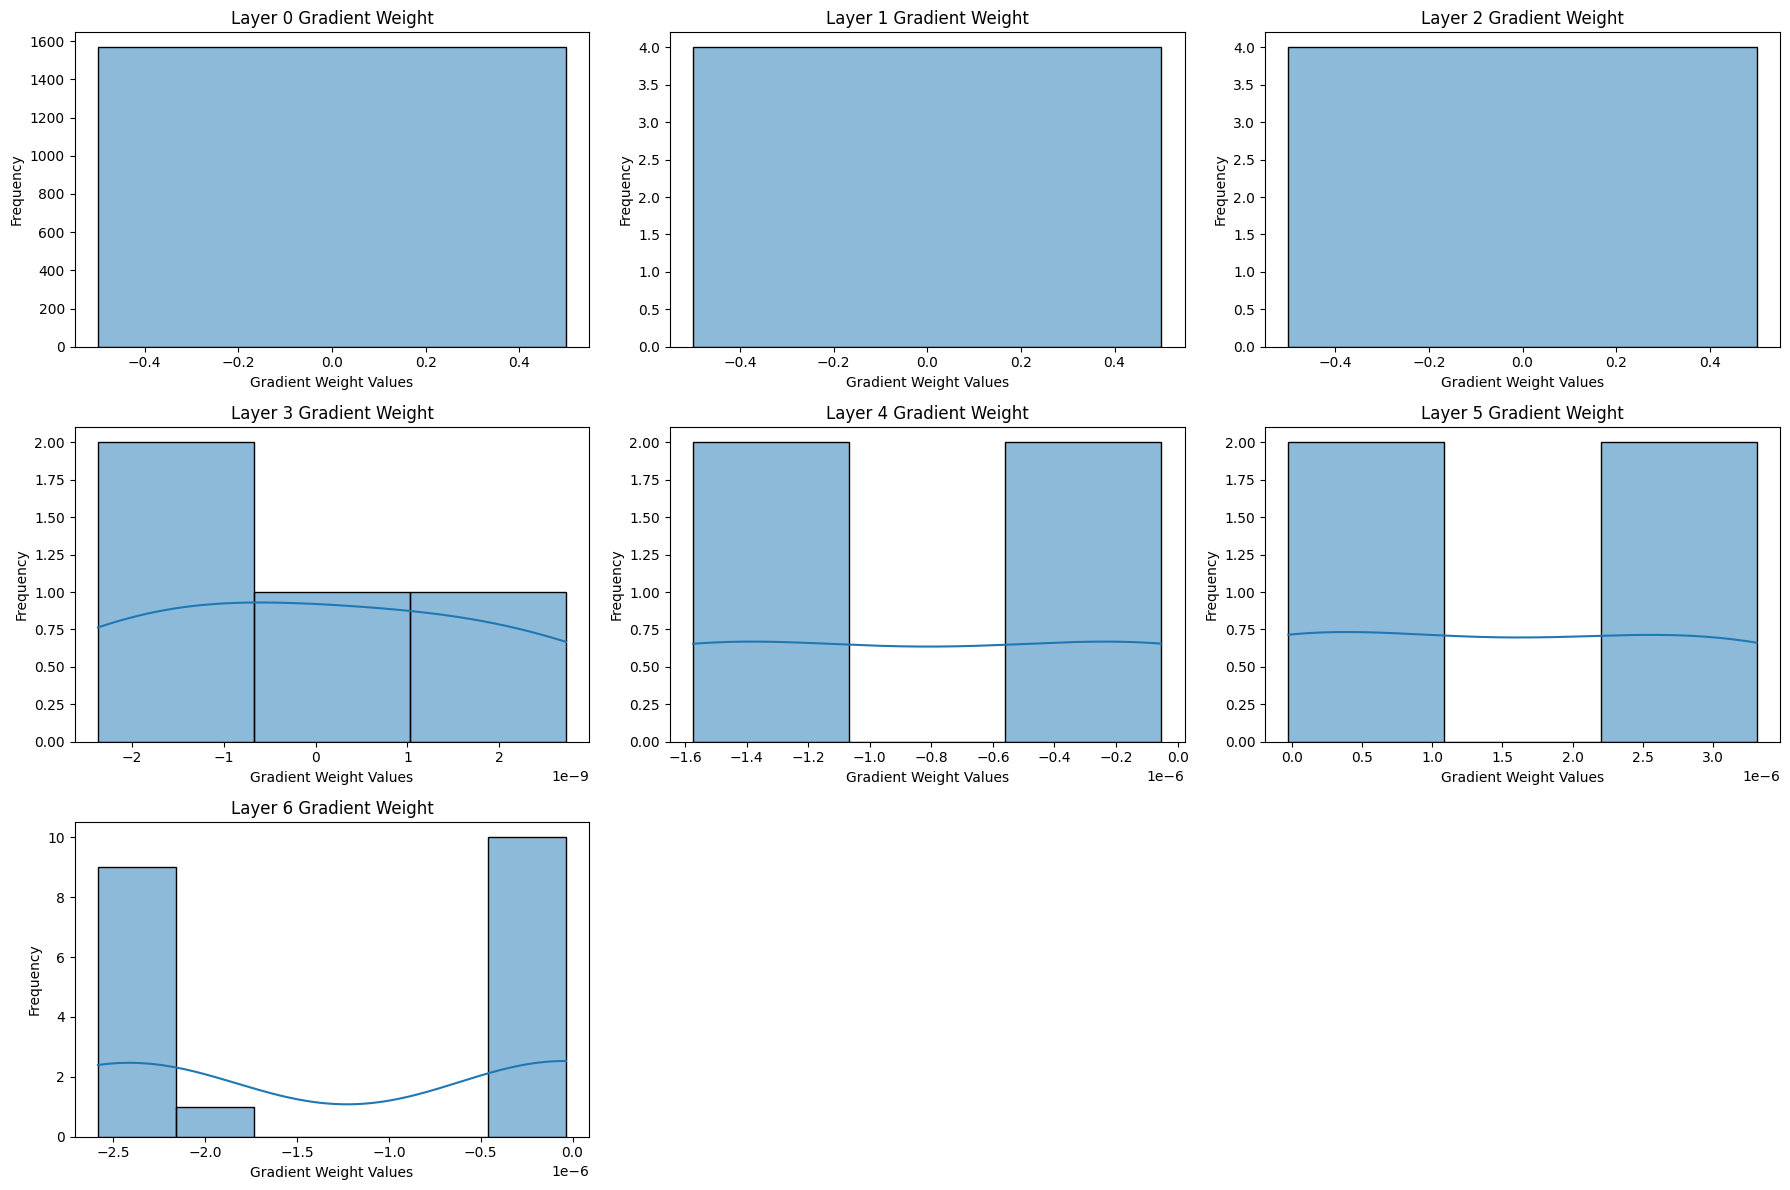

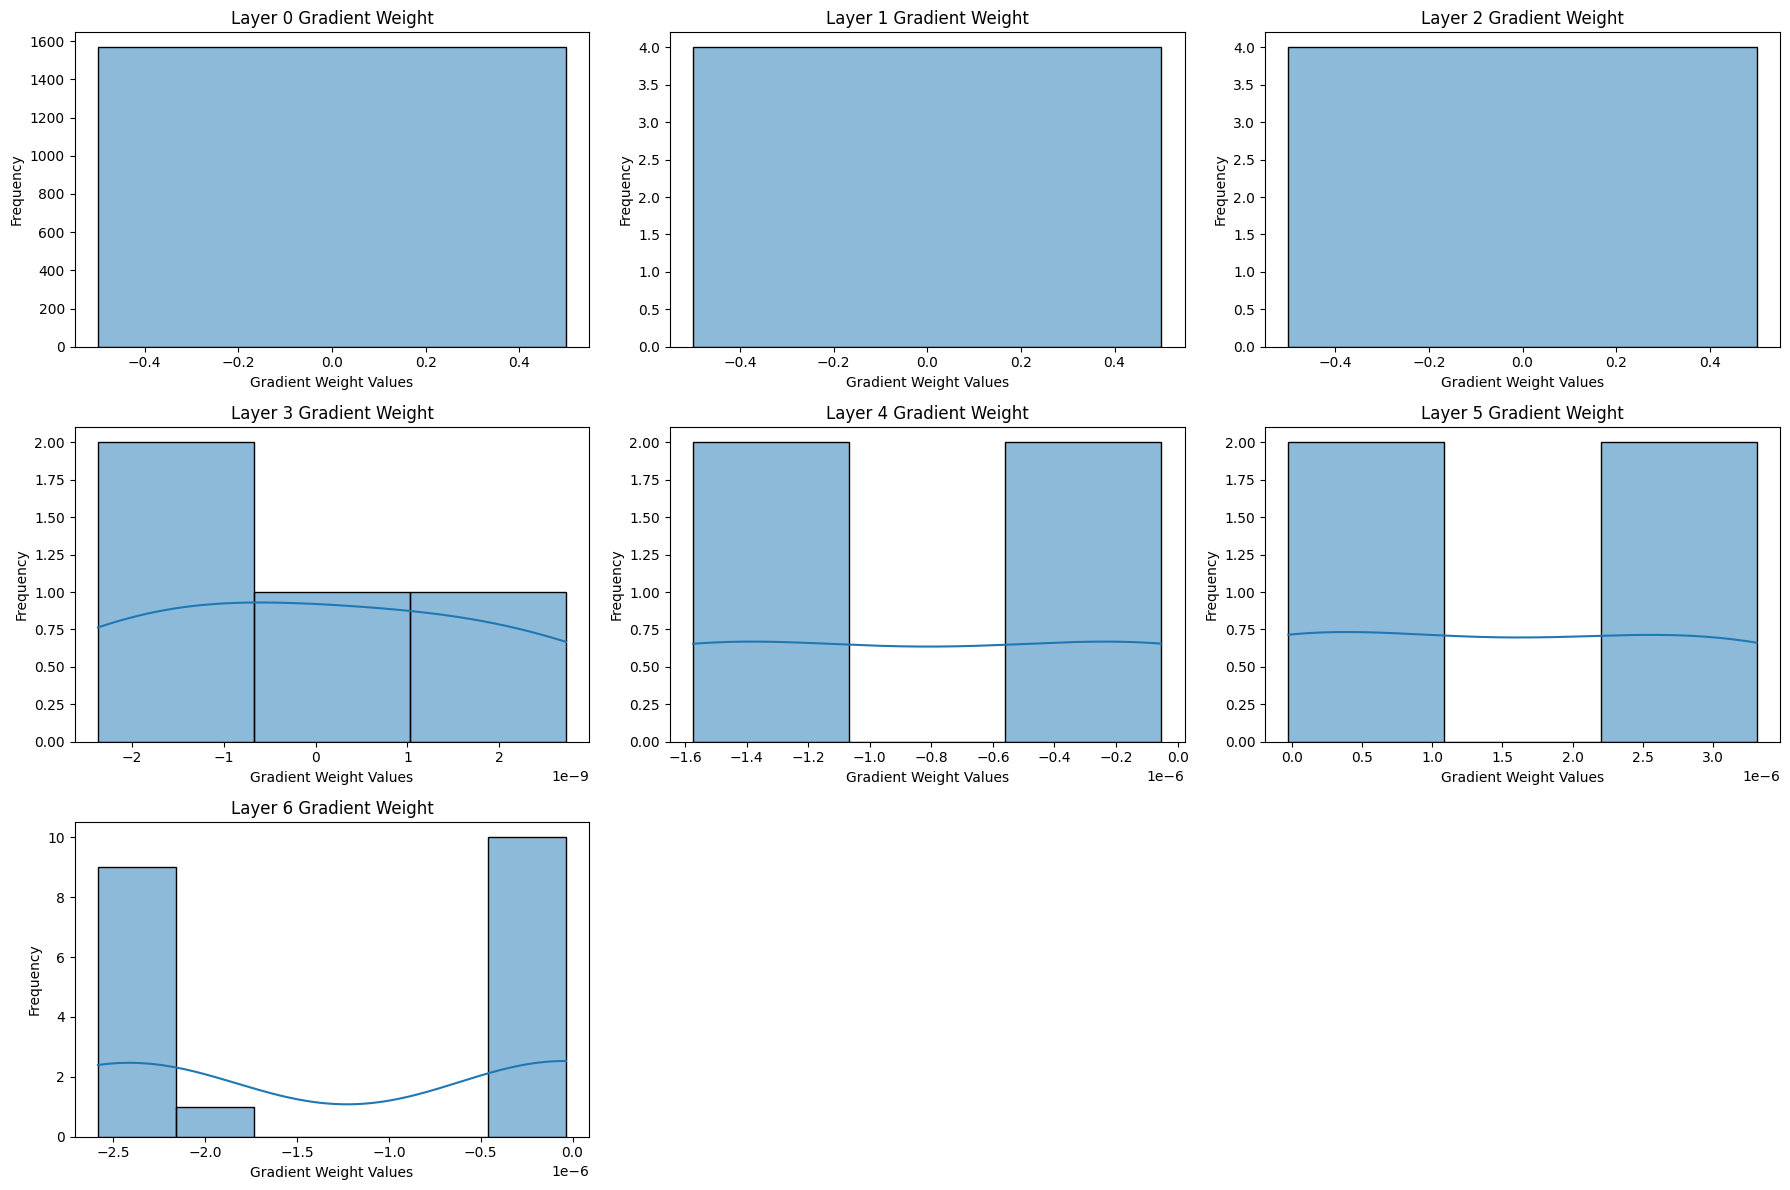

In [ ]:
loaded_model.plot_gradient_weight_distribution()

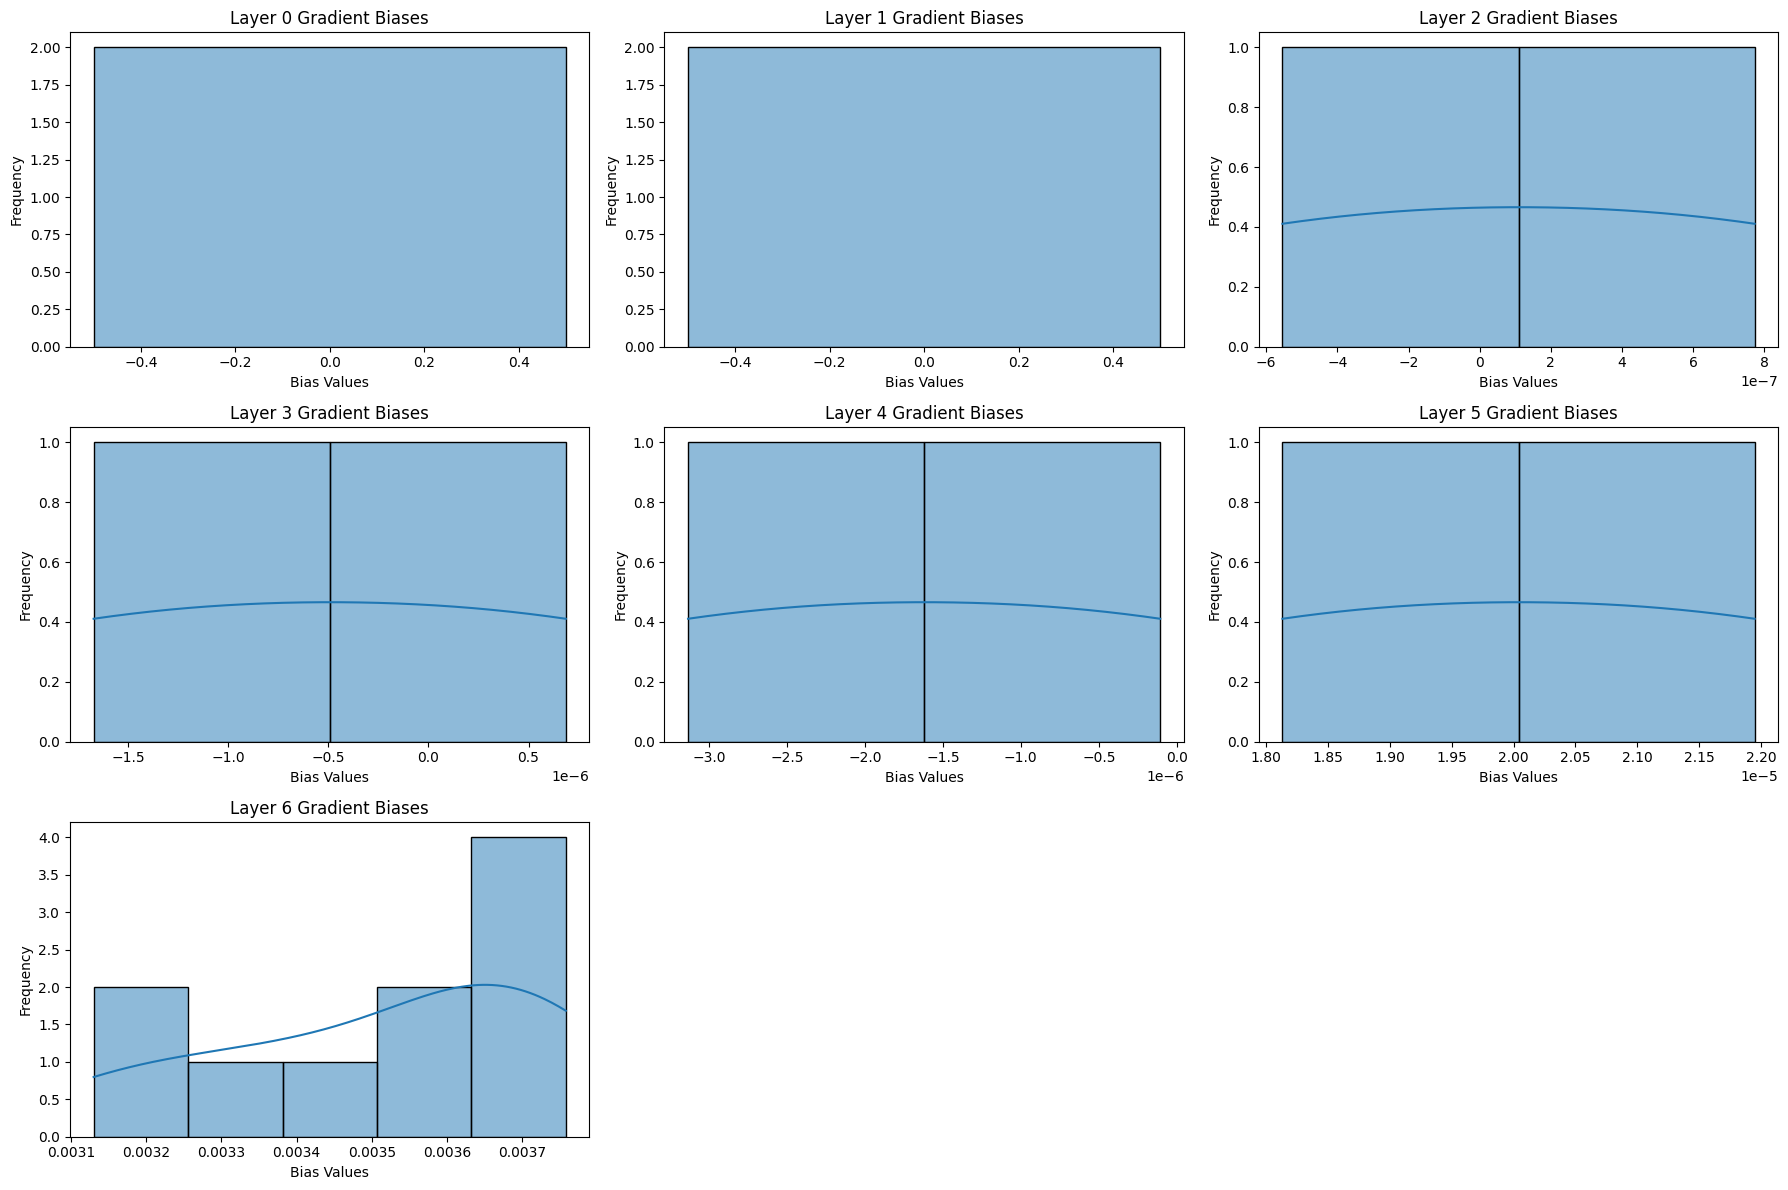

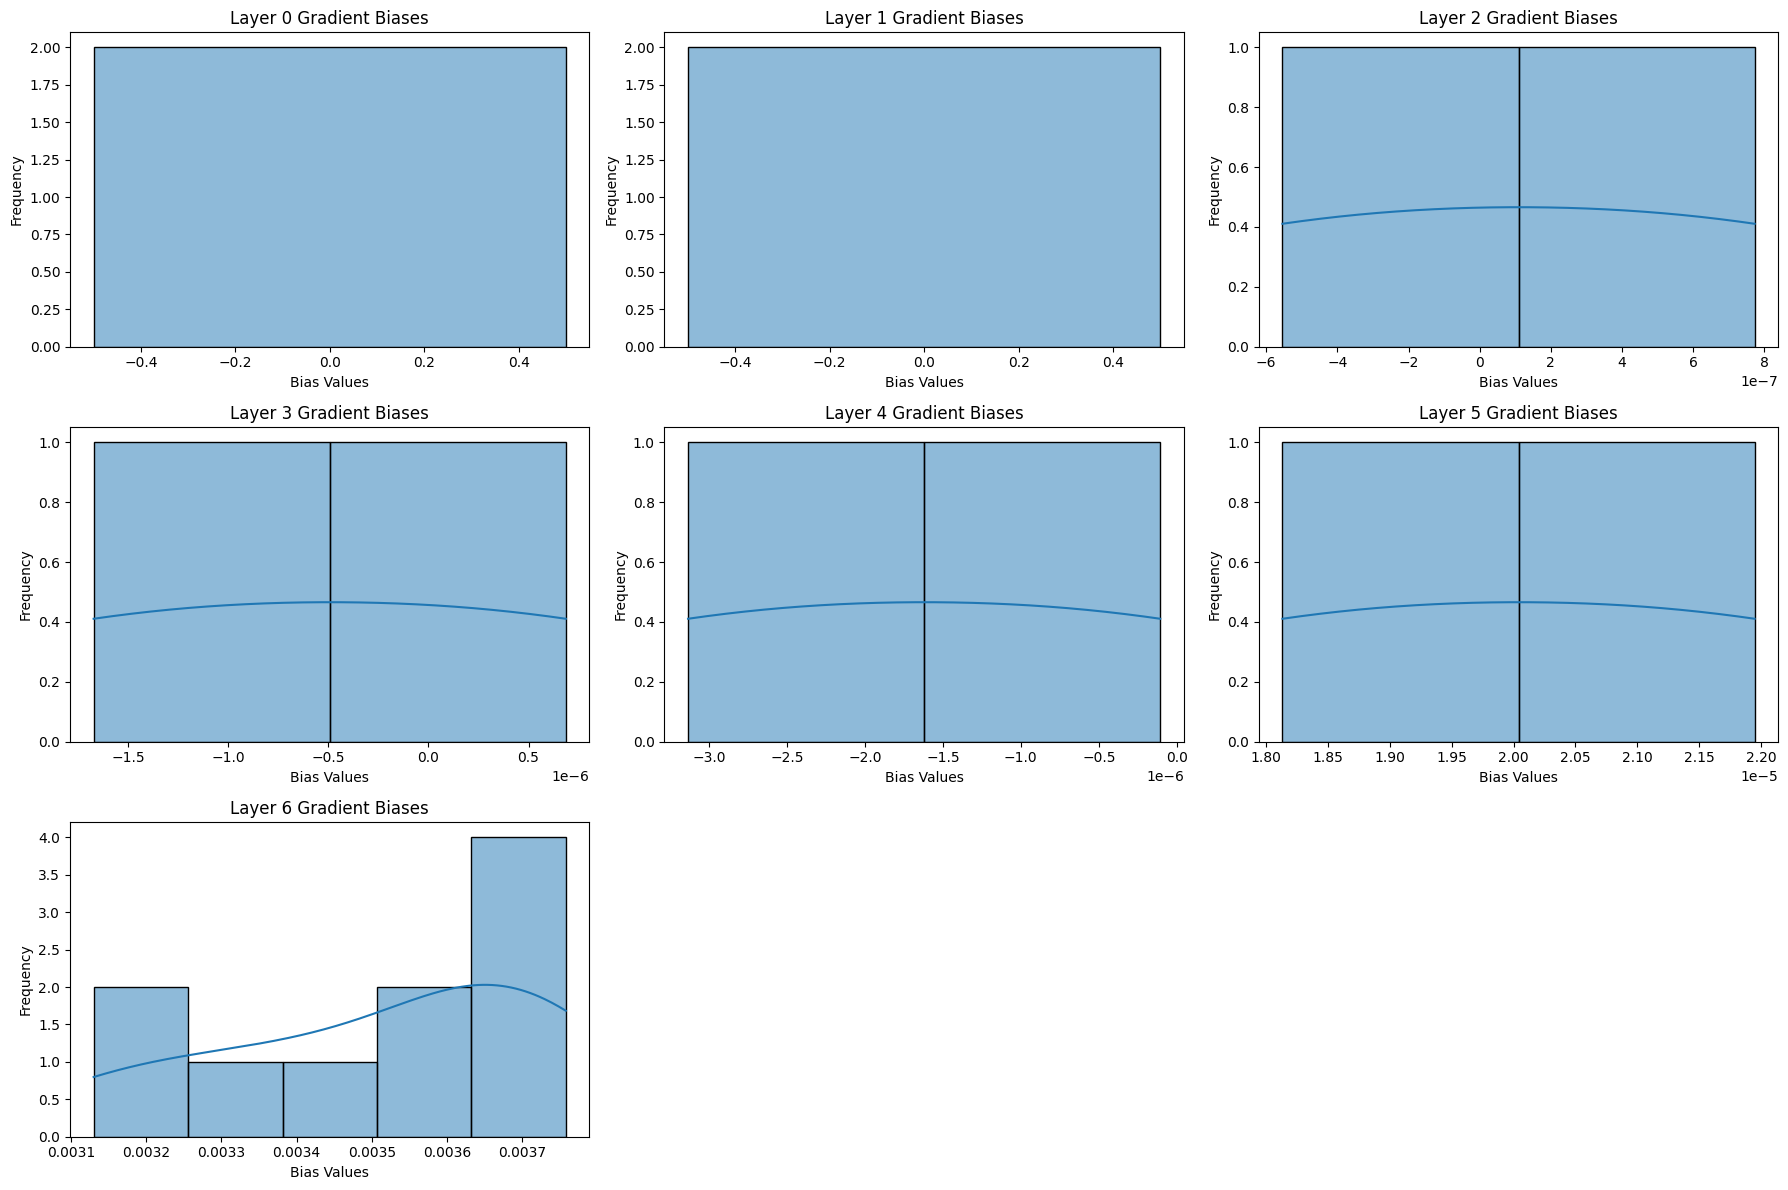

In [ ]:
loaded_model.plot_gradient_biases_distribution()

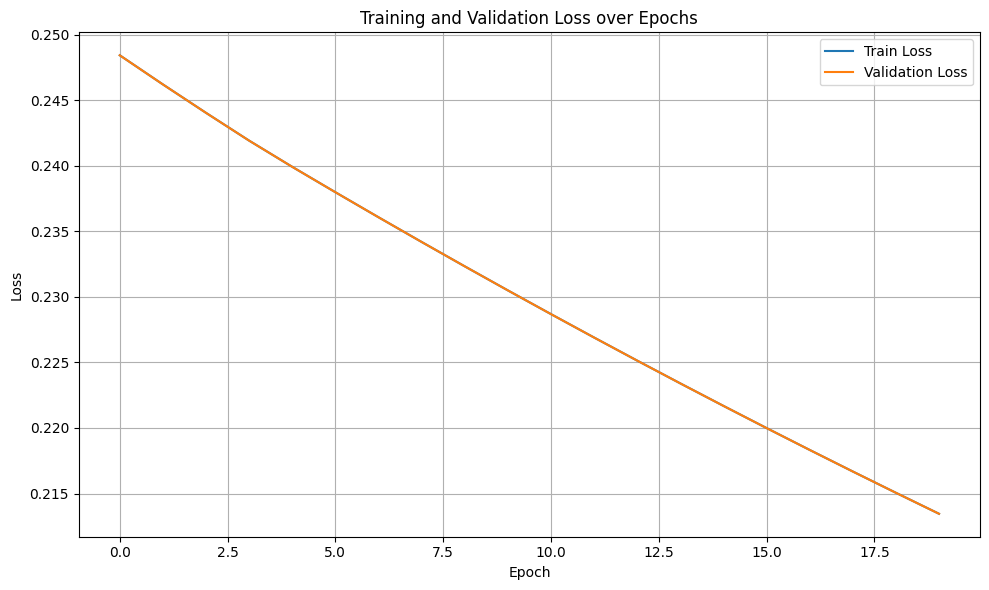

In [ ]:
model_ffnn.plot_training_loss()

# Analisis Pengaruh Beberapa Hyperparameter

In [ ]:
def accuracy(y_pred, y_test):
    correct = np.sum(y_pred == y_test)
    total = len(y_test)
    accuracy = correct / total
    return accuracy

## Pengaruh Depth

### Depth = 3

In [ ]:
model_depth_low = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=200,
    verbose=0
)

model_depth_low.build_layers(
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_depth_low.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_depth_low = model_depth_low.predict(X_test)
res_depth_low = []

for h in y_pred_depth_low:
    max_index = np.argmax(h)
    res_depth_low.append(max_index)

res_depth_low = np.array(res_depth_low)

In [ ]:
acc_depth_low = accuracy(res_depth_low, y_test)
acc_depth_low

0.177

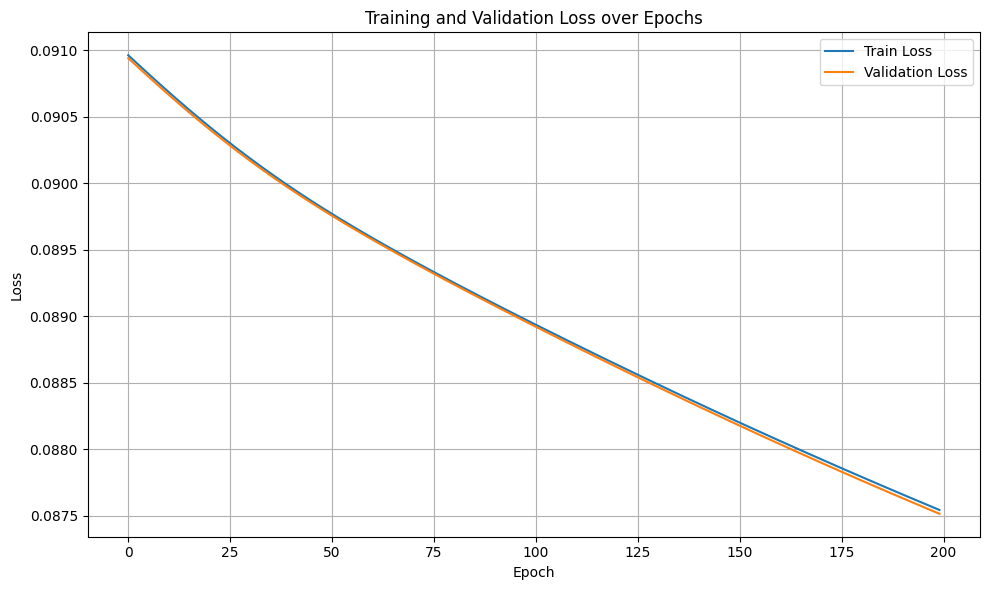

In [ ]:
model_depth_low.plot_training_loss()

### Depth = 5

In [ ]:
model_depth_intermediate = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=200,
    verbose=0
)

model_depth_intermediate.build_layers(
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_depth_intermediate.fit(X_train, y_train, X_val, y_val)

KeyboardInterrupt: 

In [ ]:
y_pred_depth_intermediate = model_depth_intermediate.predict(X_test)
res_depth_intermediate = []

for h in y_pred_depth_intermediate:
    max_index = np.argmax(h)
    res_depth_intermediate.append(max_index)

res_depth_intermediate = np.array(res_depth_intermediate)

In [ ]:
acc_depth_intermediate = accuracy(res_depth_intermediate, y_test)
acc_depth_intermediate

0.2388

In [ ]:
model_depth_intermediate.plot_training_loss()

<bound method FFNN.plot_training_loss of <__main__.FFNN object at 0x000002DCCF1A7350>>

### Depth = 7

In [ ]:
model_depth_high = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=200,
    verbose=0
)

model_depth_high.build_layers(
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_depth_high.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_depth_high = model_depth_high.predict(X_test)
res_depth_high = []

for h in y_pred_depth_high:
    max_index = np.argmax(h)
    res_depth_high.append(max_index)

res_depth_high = np.array(res_depth_high)

In [ ]:
acc_depth_high = accuracy(res_depth_high, y_test)
acc_depth_high

0.1126

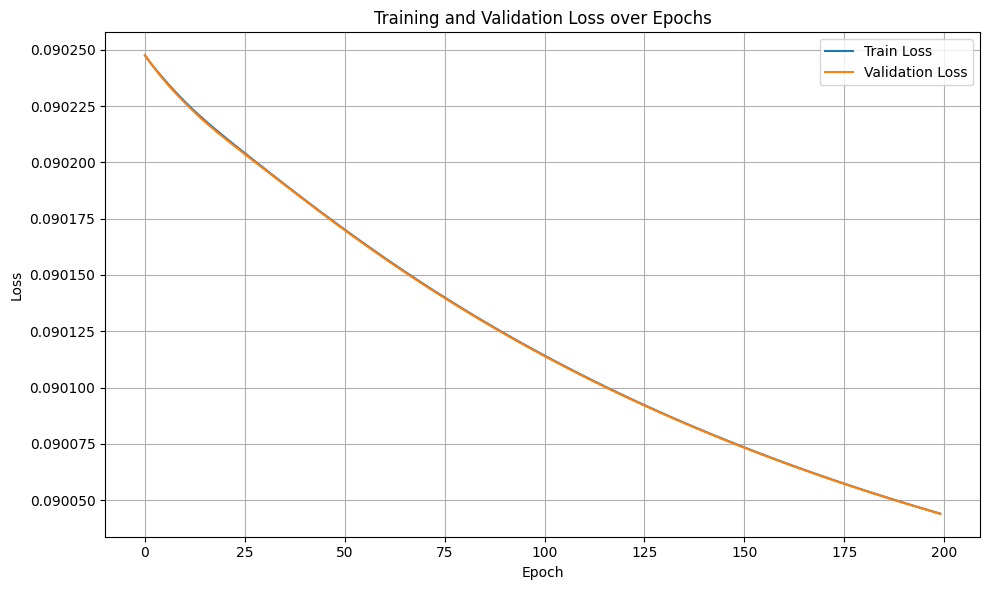

In [ ]:
model_depth_high.plot_training_loss()

## Pengaruh Width

### Width = 5 neuron

In [ ]:
model_width_low = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=200,
    verbose=0
)

model_width_low.build_layers(
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_width_low.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_width_low = model_width_low.predict(X_test)
res_width_low = []

for h in y_pred_width_low:
    max_index = np.argmax(h)
    res_width_low.append(max_index)

res_width_low = np.array(res_width_low)

In [ ]:
acc_width_low = accuracy(res_width_low, y_test)
acc_width_low

0.1664

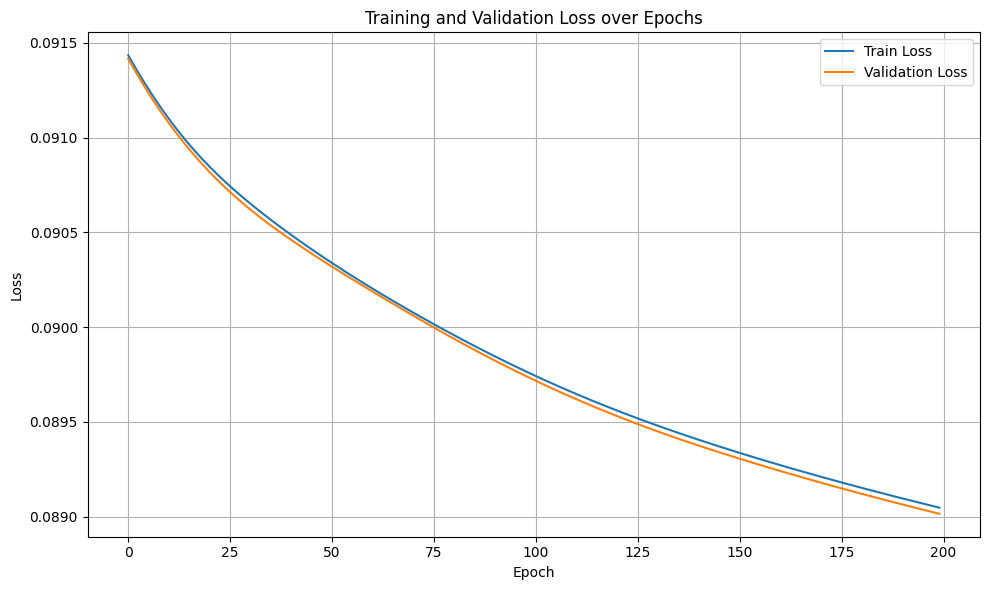

In [ ]:
model_width_low.plot_training_loss()

### Width = 10 neuron

In [ ]:
model_width_intermediate = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=200,
    verbose=0
)

model_width_intermediate.build_layers(
    Layer(n_neurons=10, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_width_intermediate.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_width_intermediate = model_width_intermediate.predict(X_test)
res_width_intermediate = []

for h in y_pred_width_intermediate:
    max_index = np.argmax(h)
    res_width_intermediate.append(max_index)

res_width_intermediate = np.array(res_width_intermediate)

In [ ]:
acc_width_intermediate = accuracy(res_width_intermediate, y_test)
acc_width_intermediate

0.3346

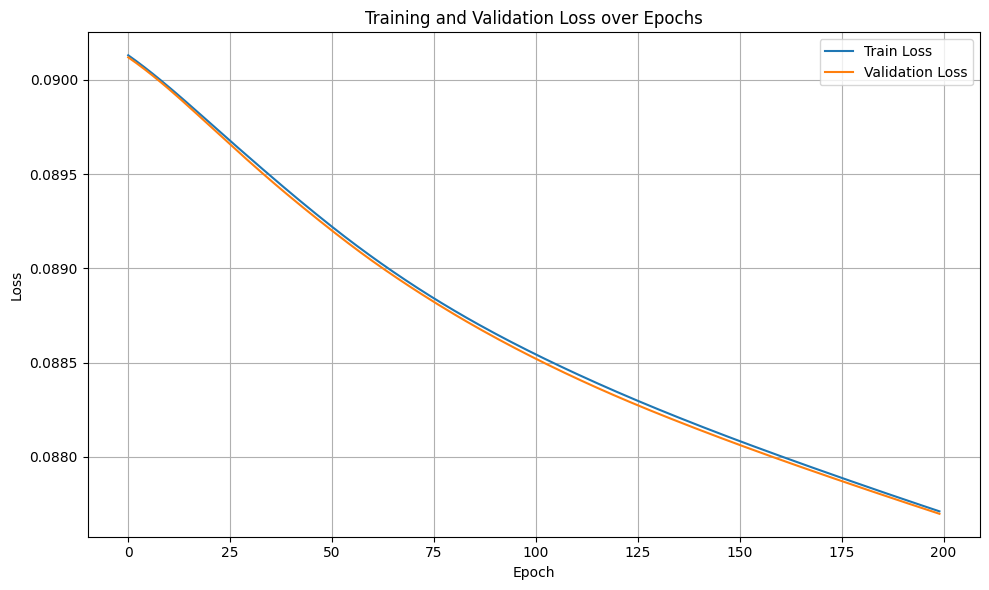

In [ ]:
model_width_intermediate.plot_training_loss()

### Width = 15 neuron

In [ ]:
model_width_high = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=200,
    verbose=0
)

model_width_high.build_layers(
    Layer(n_neurons=15, init='uniform', activation='softmax'),
    Layer(n_neurons=15, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_width_high.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_width_high = model_width_high.predict(X_test)
res_width_high = []

for h in y_pred_width_high:
    max_index = np.argmax(h)
    res_width_high.append(max_index)

res_width_high = np.array(res_width_high)

In [ ]:
acc_width_high = accuracy(res_width_high, y_test)
acc_width_high

0.1696

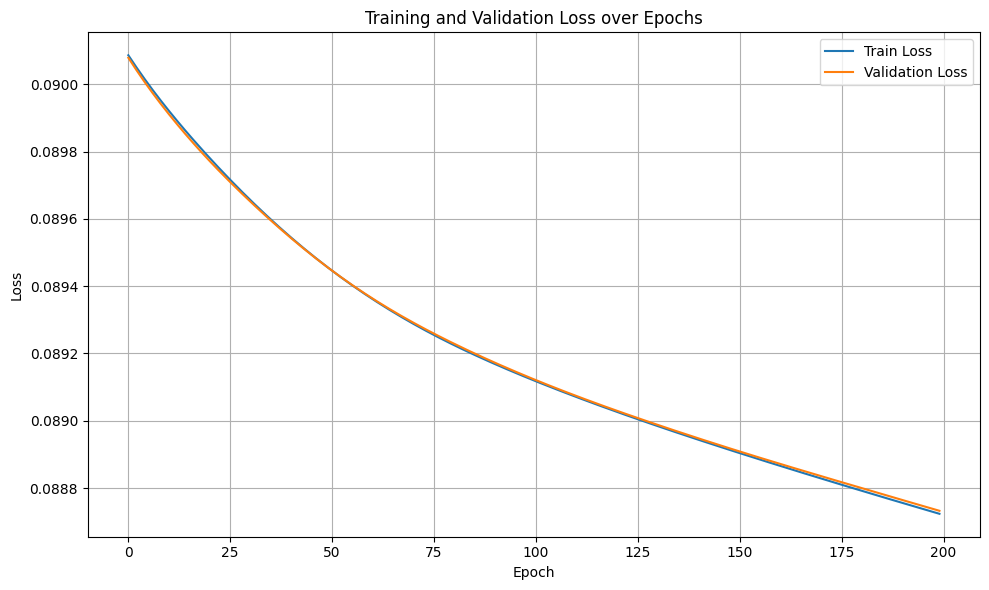

In [ ]:
model_width_high.plot_training_loss()

## Pengaruh Learning Rate

### Learning rate = 0.001

In [ ]:
model_lr_low = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.001,
    epochs=200,
    verbose=0
)

model_lr_low.build_layers(
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_lr_low.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_lr_low = model_lr_low.predict(X_test)
res_lr_low = []

for h in y_pred_lr_low:
    max_index = np.argmax(h)
    res_lr_low.append(max_index)

res_lr_low = np.array(res_lr_low)

In [ ]:
acc_lr_low = accuracy(res_lr_low, y_test)
acc_lr_low

0.0974

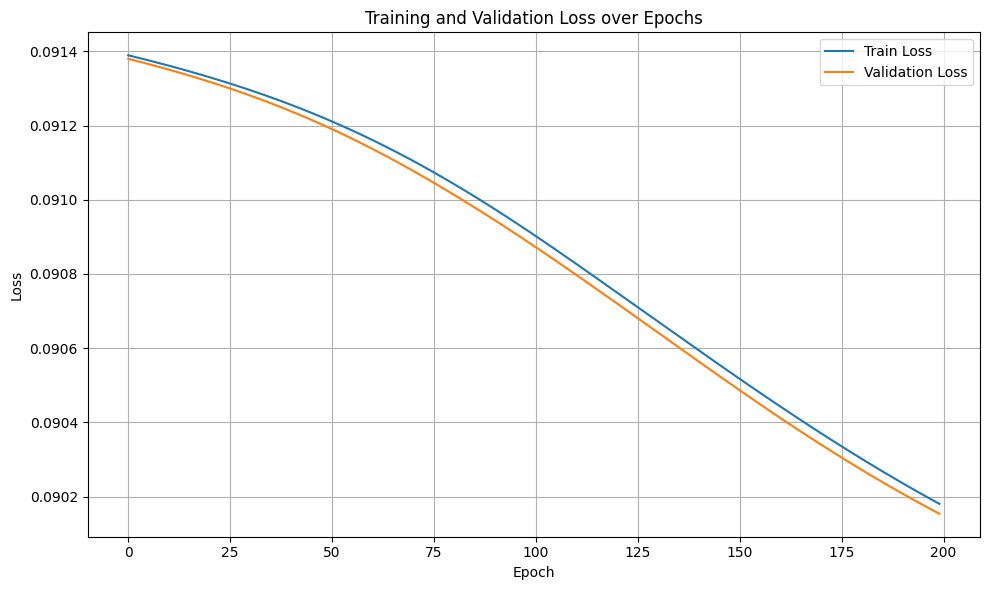

In [ ]:
model_lr_low.plot_training_loss()

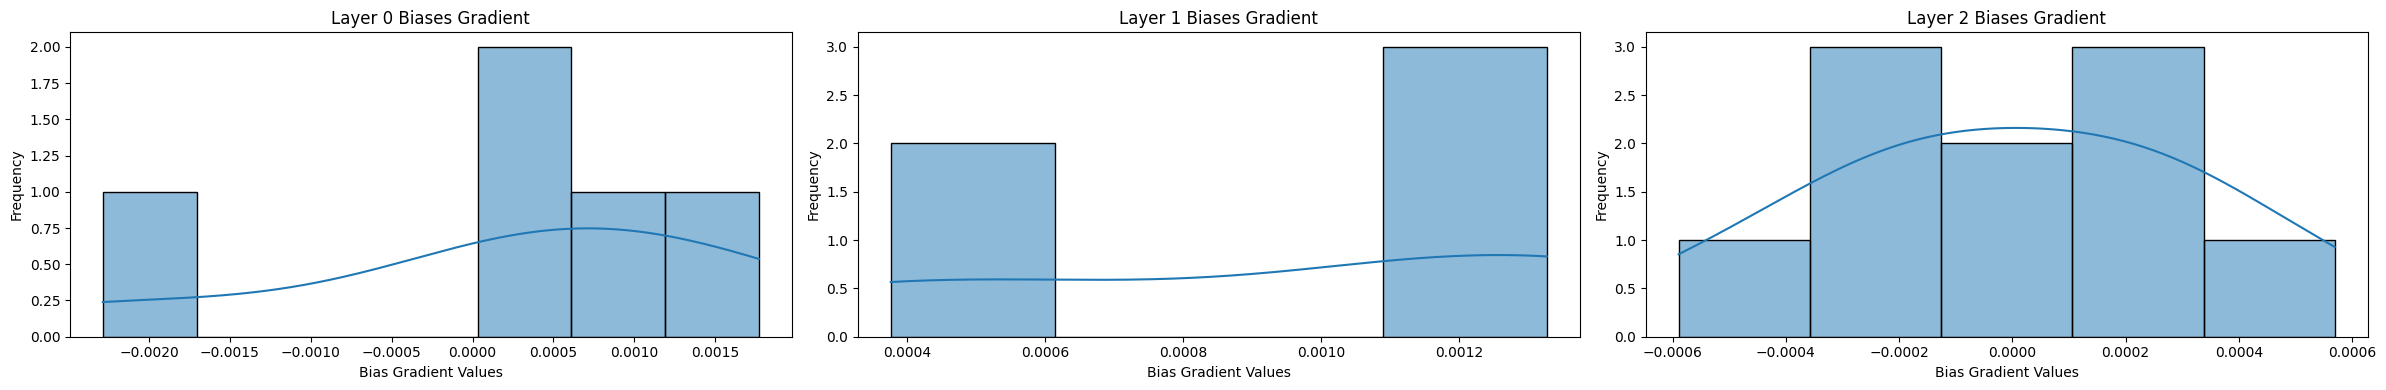

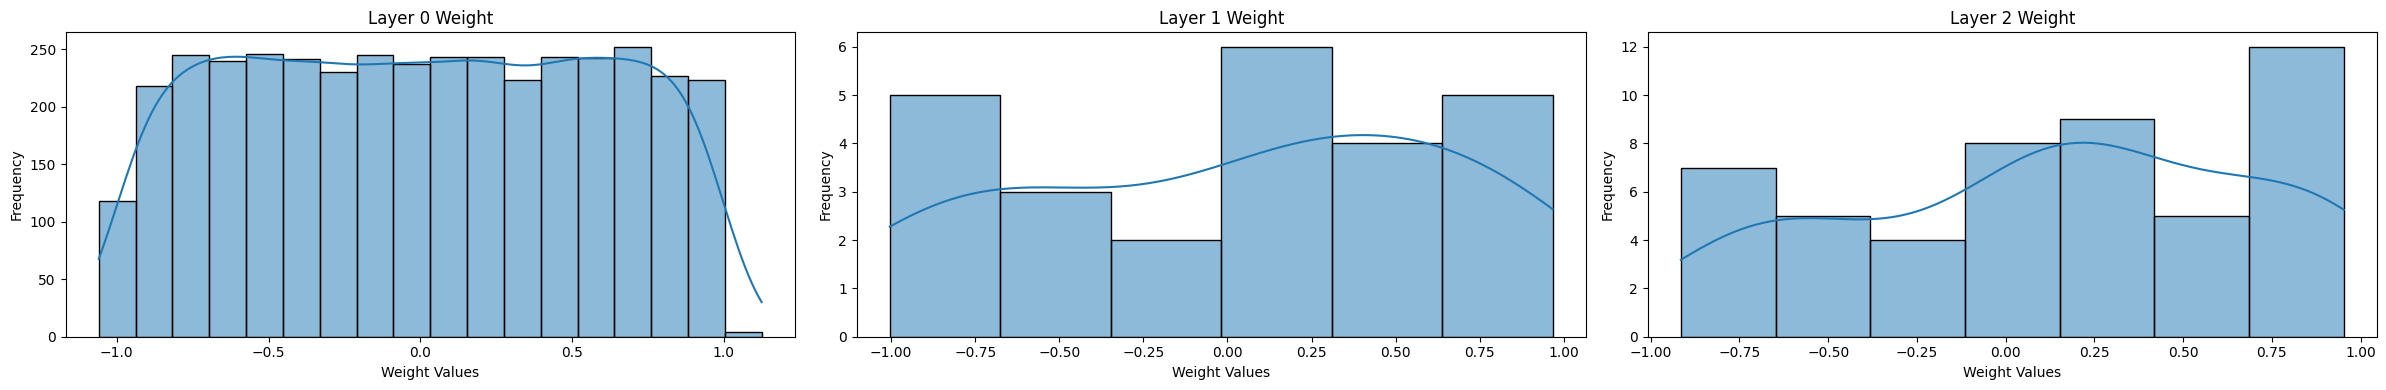

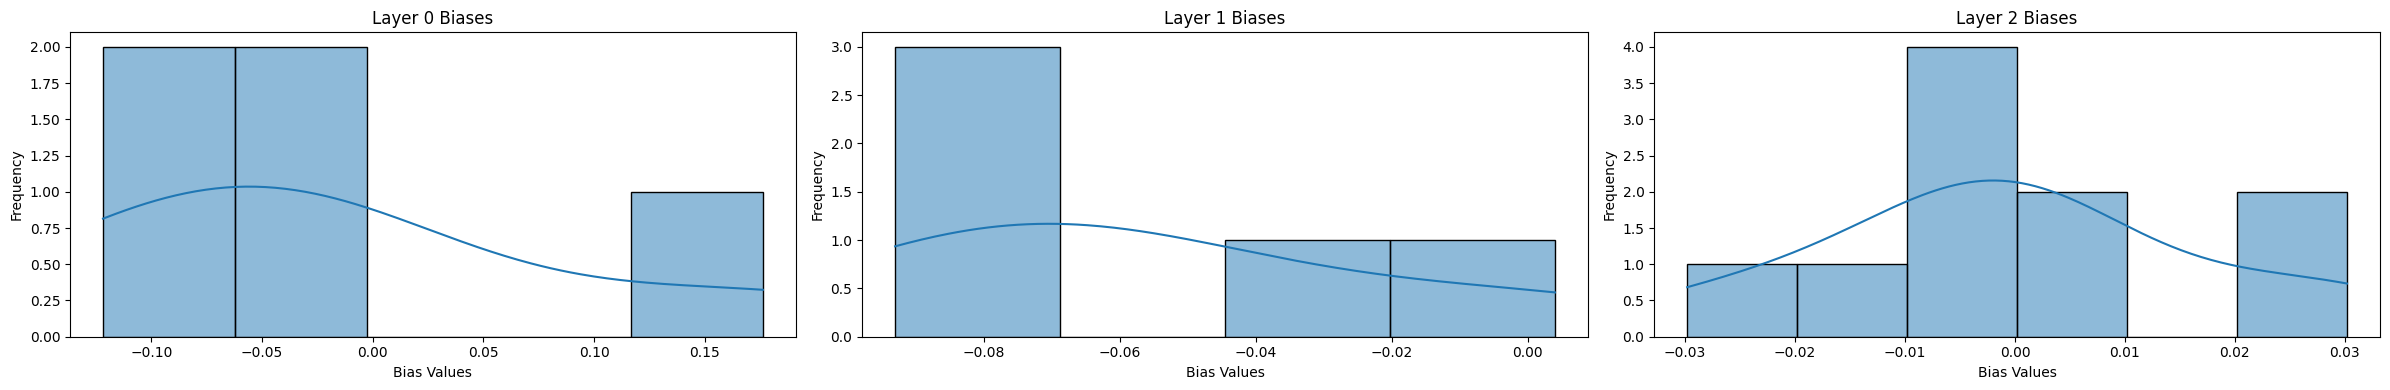

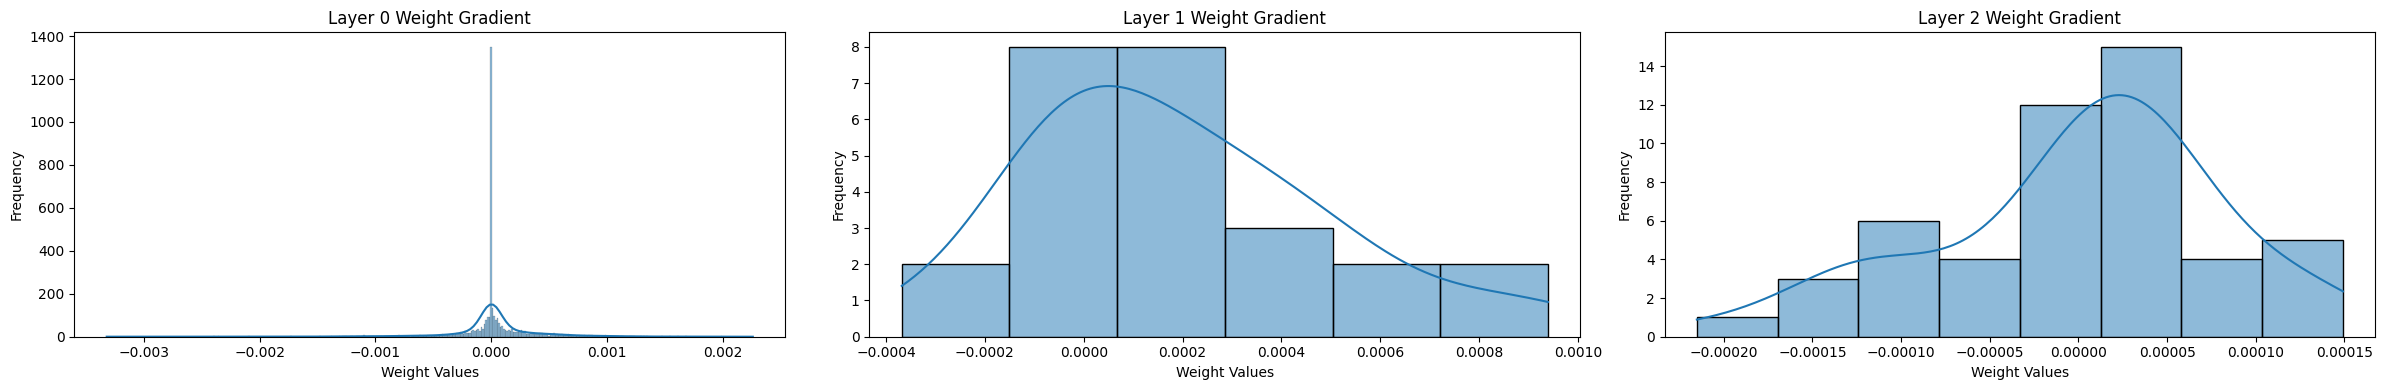

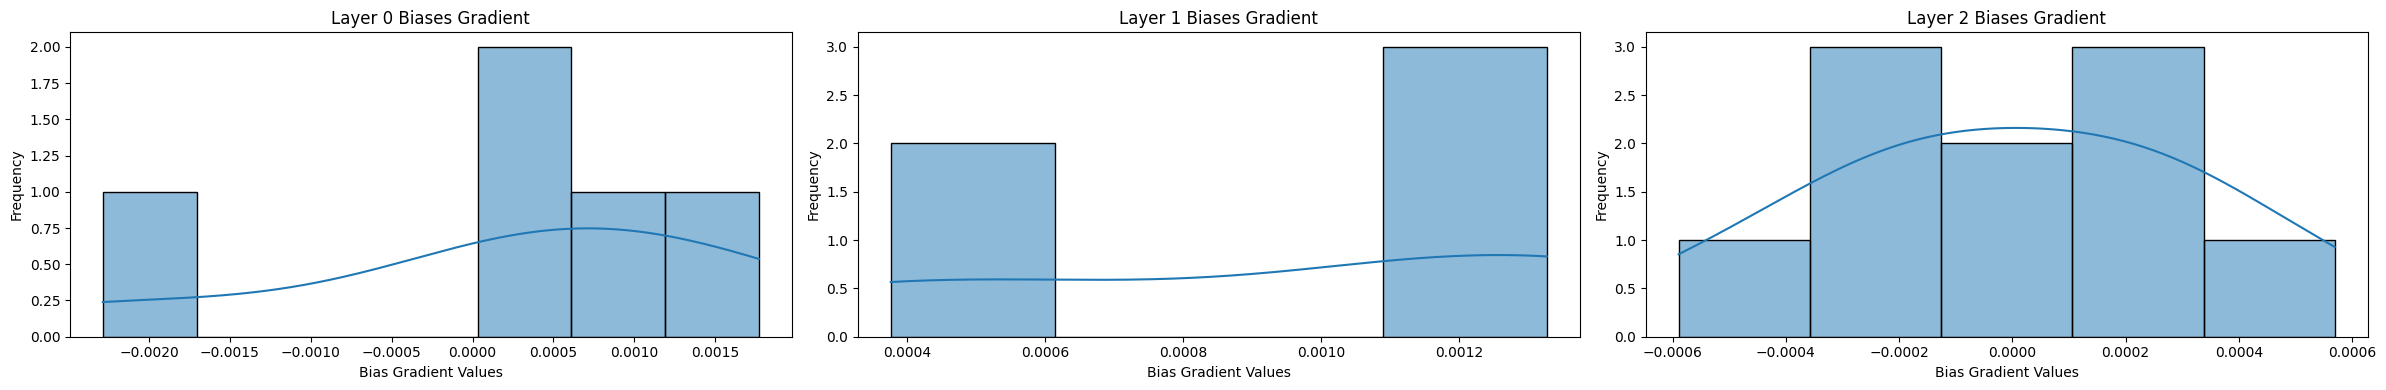

In [ ]:
model_lr_low.plot_weight_distribution()
model_lr_low.plot_biases_distribution()
model_lr_low.plot_gradient_weight_distribution()
model_lr_low.plot_gradient_biases_distribution()

### Learning rate = 0.01

In [ ]:
model_lr_intermediate = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.01,
    epochs=200,
    verbose=0
)

model_lr_intermediate.build_layers(
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_lr_intermediate.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_lr_intermediate = model_lr_intermediate.predict(X_test)
res_lr_intermediate = []

for h in y_pred_lr_intermediate:
    max_index = np.argmax(h)
    res_lr_intermediate.append(max_index)

res_lr_intermediate = np.array(res_lr_intermediate)

In [ ]:
acc_lr_intermediate = accuracy(res_lr_intermediate, y_test)
acc_lr_intermediate

0.2094

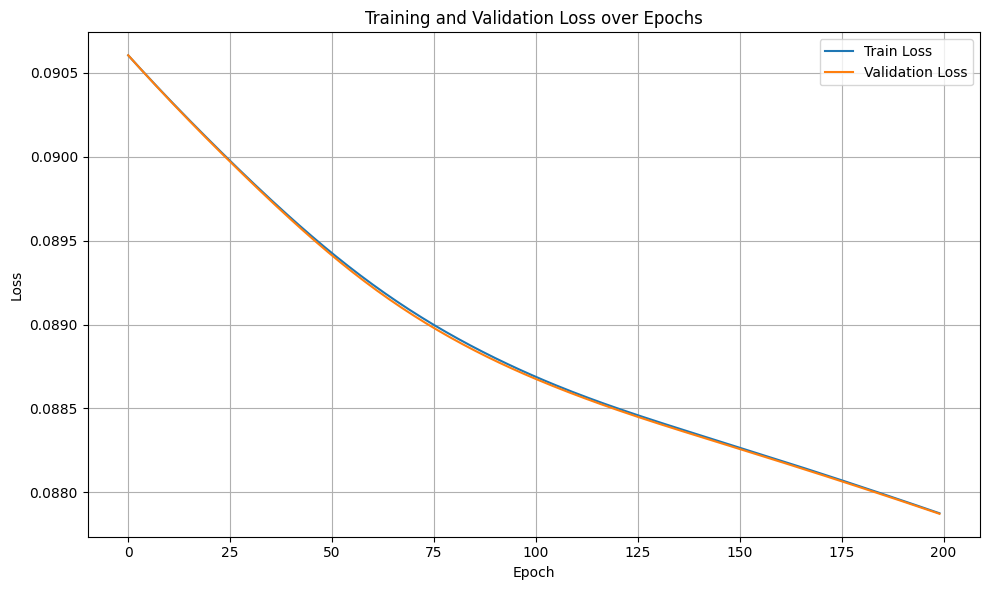

In [ ]:
model_lr_intermediate.plot_training_loss()

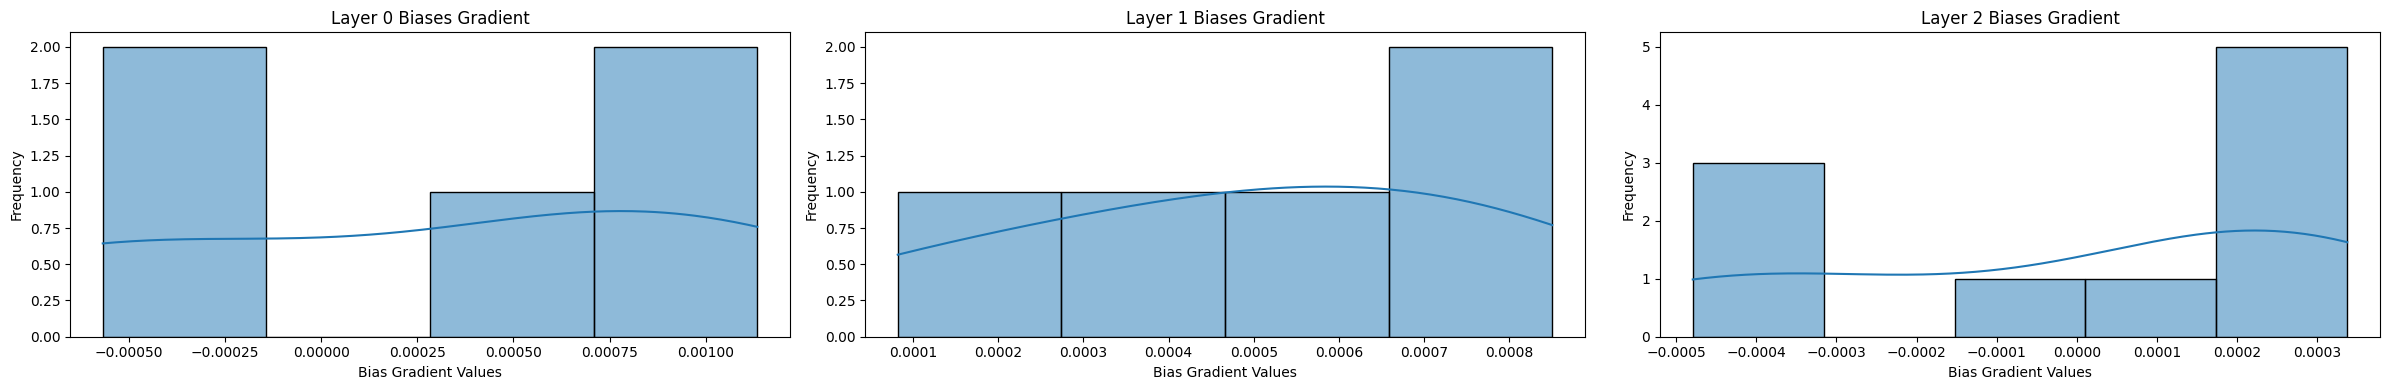

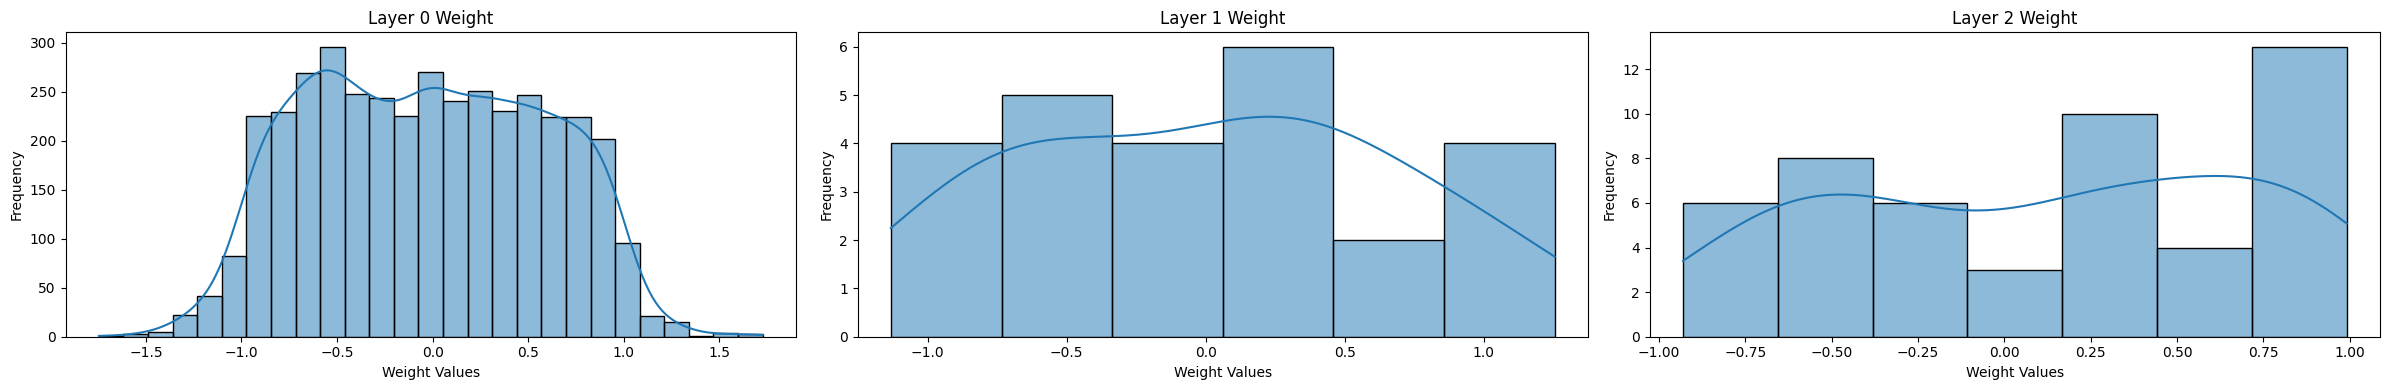

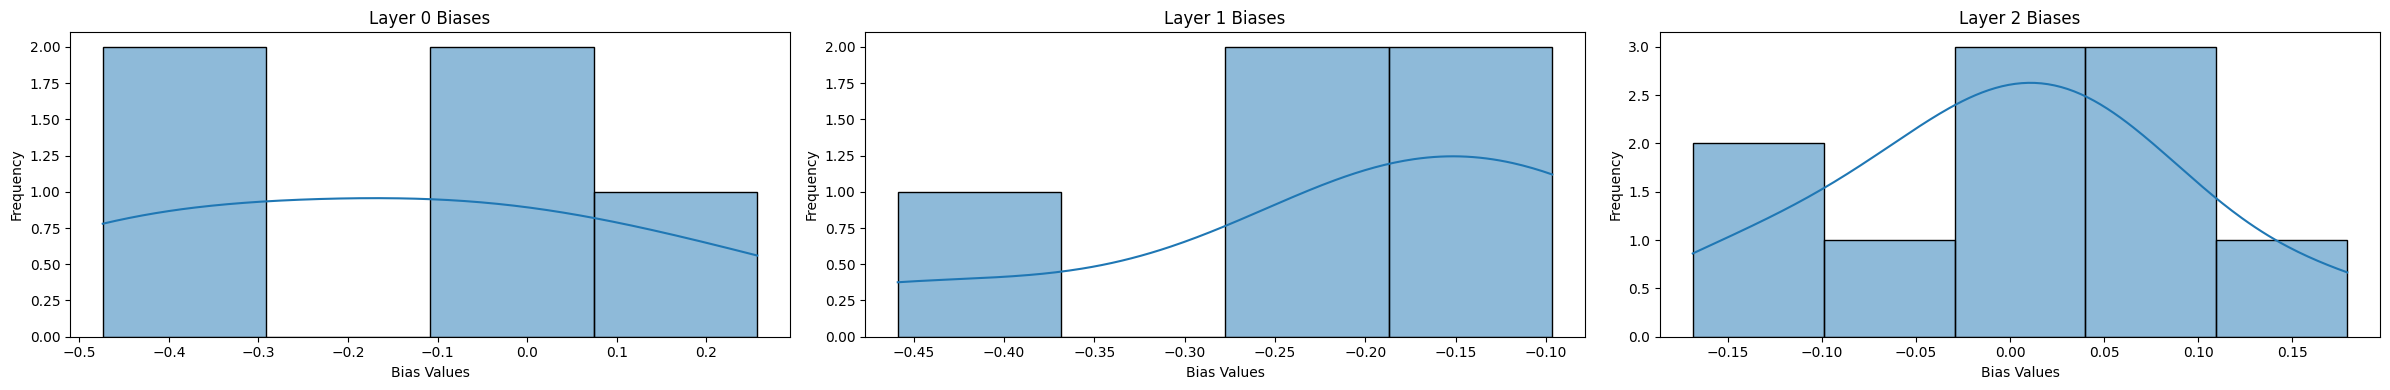

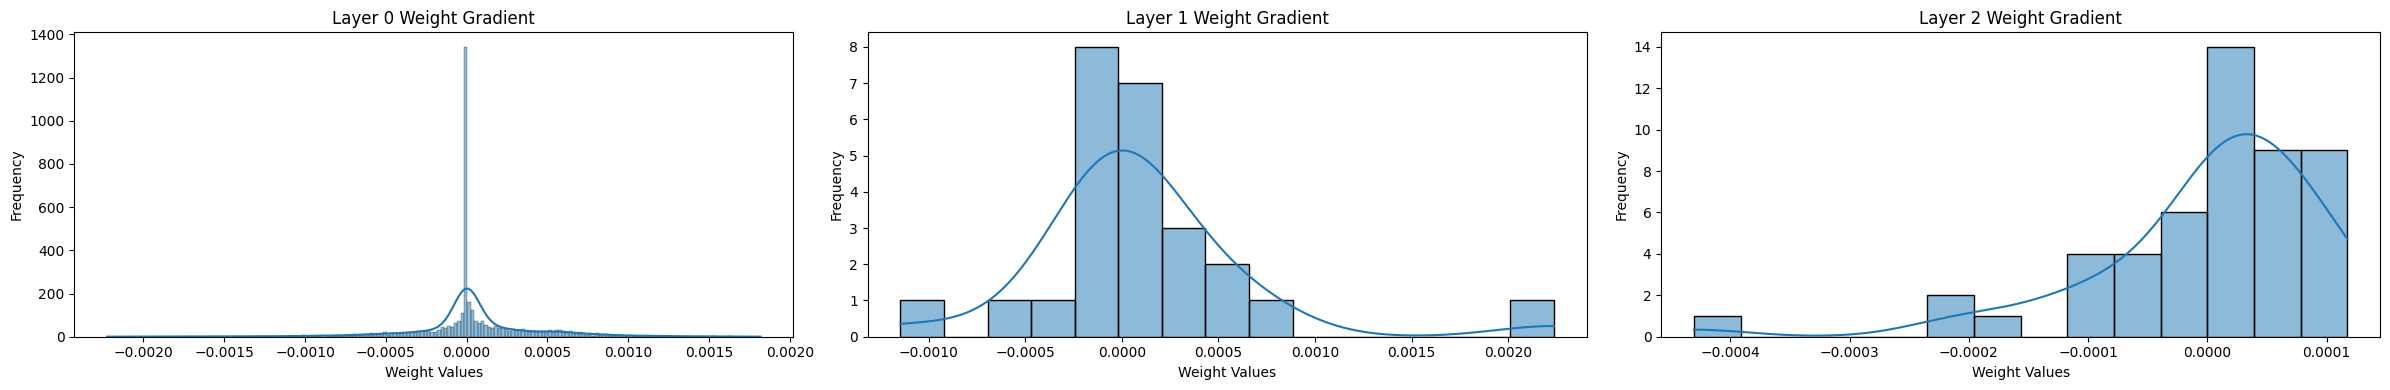

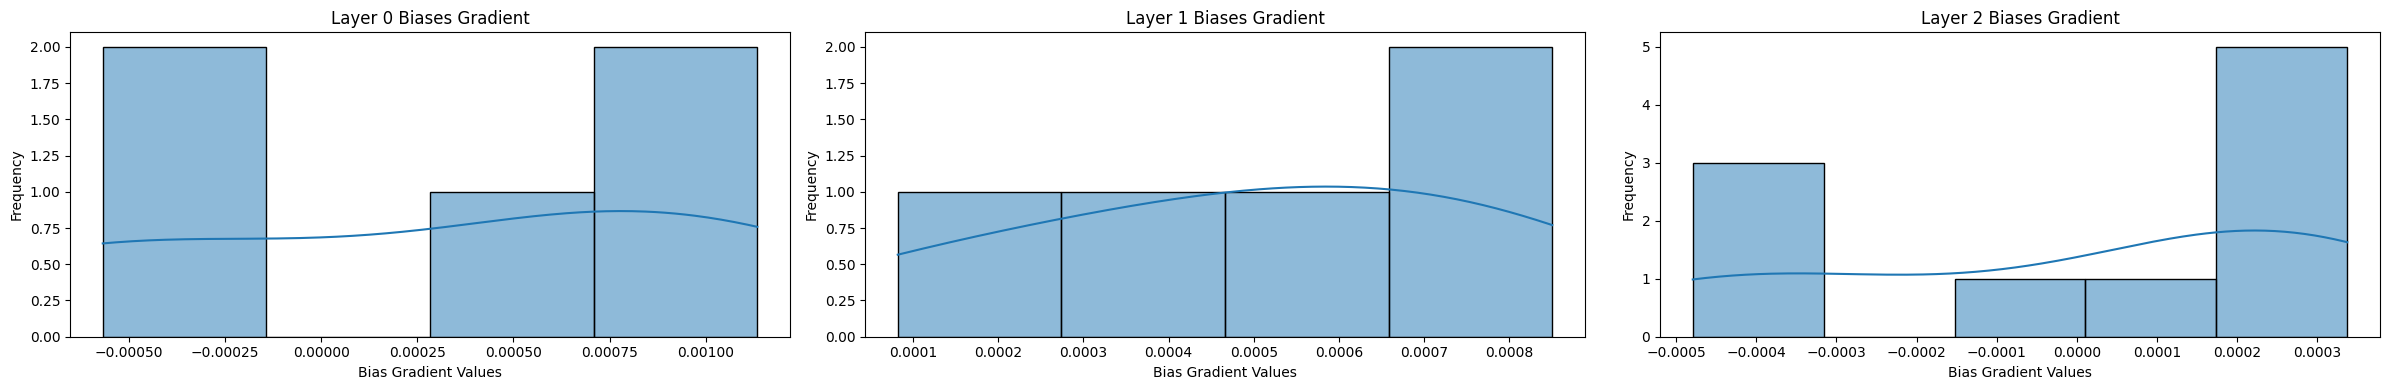

In [ ]:
model_lr_intermediate.plot_weight_distribution()
model_lr_intermediate.plot_biases_distribution()
model_lr_intermediate.plot_gradient_weight_distribution()
model_lr_intermediate.plot_gradient_biases_distribution()

### Learning rate = 0.1

In [ ]:
model_lr_high = FFNN(
    loss='mse',
    batch_size=200,
    learning_rate=0.1,
    epochs=200,
    verbose=0
)

model_lr_high.build_layers(
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=5, init='uniform', activation='softmax'),
    Layer(n_neurons=10, init='uniform', activation='softmax'),
)

model_lr_high.fit(X_train, y_train, X_val, y_val)

In [ ]:
y_pred_lr_high = model_lr_high.predict(X_test)
res_lr_high = []

for h in y_pred_lr_high:
    max_index = np.argmax(h)
    res_lr_high.append(max_index)

res_lr_high = np.array(res_lr_high)

In [ ]:
acc_lr_high = accuracy(res_lr_high, y_test)
acc_lr_high

0.2138

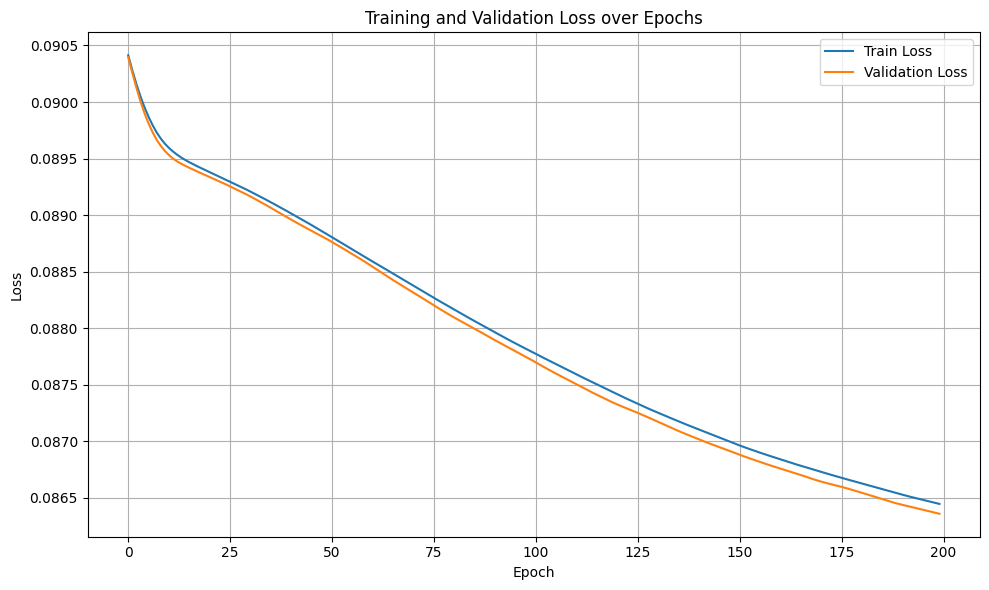

In [ ]:
model_lr_high.plot_training_loss()

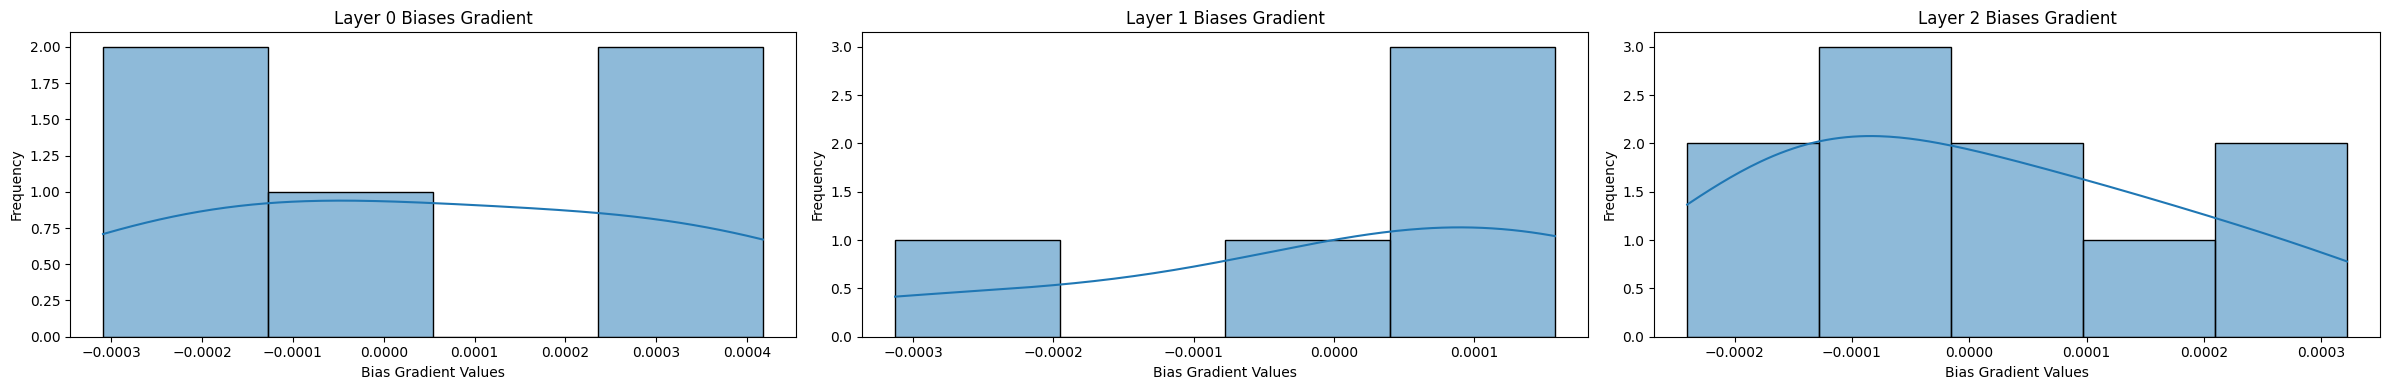

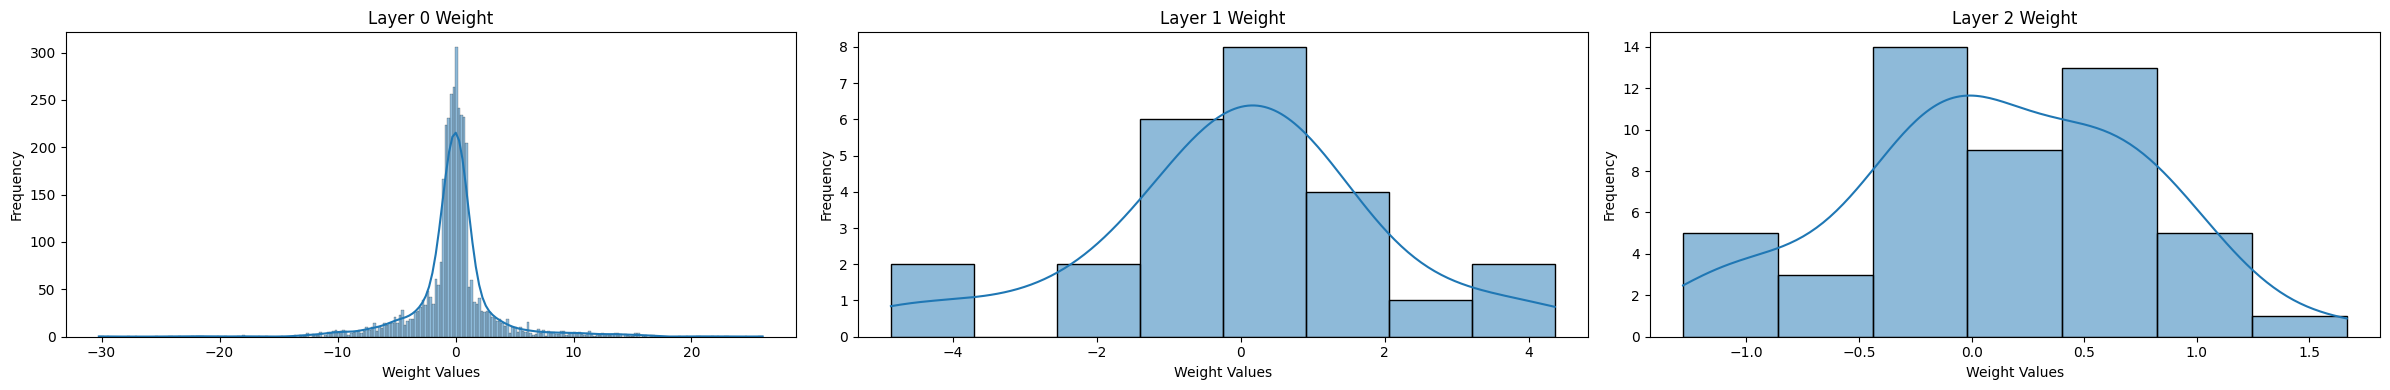

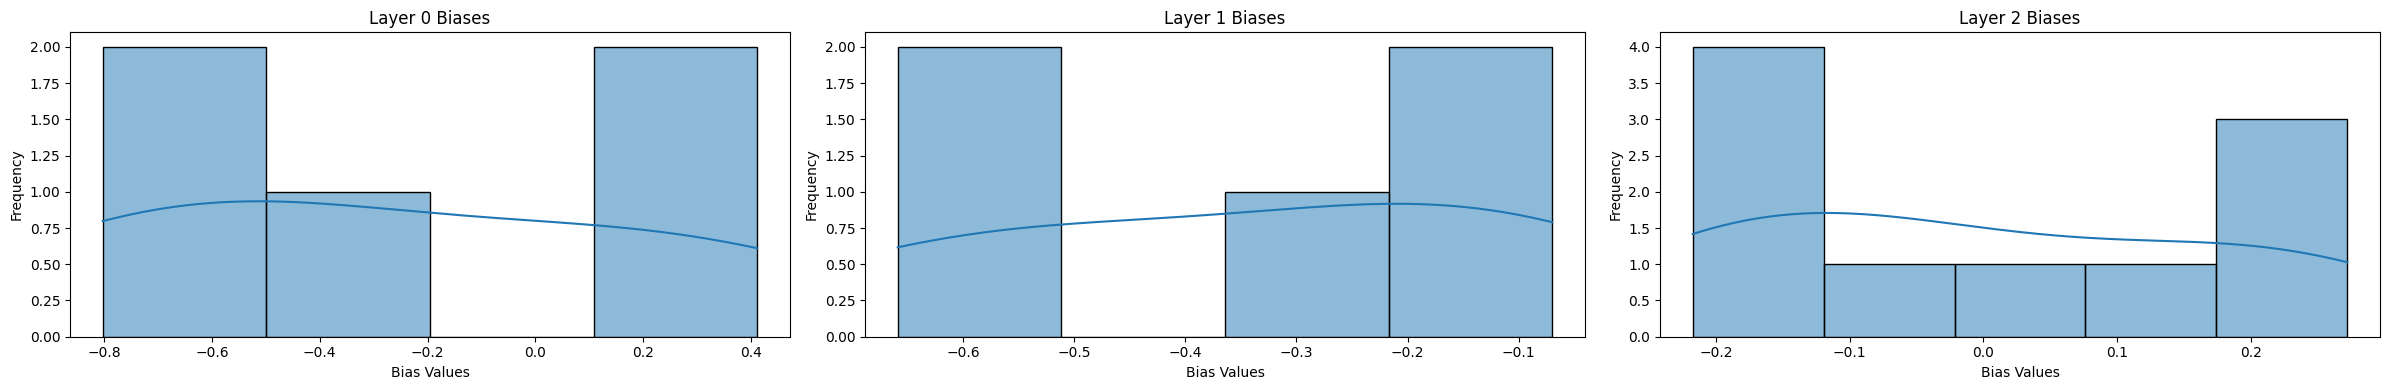

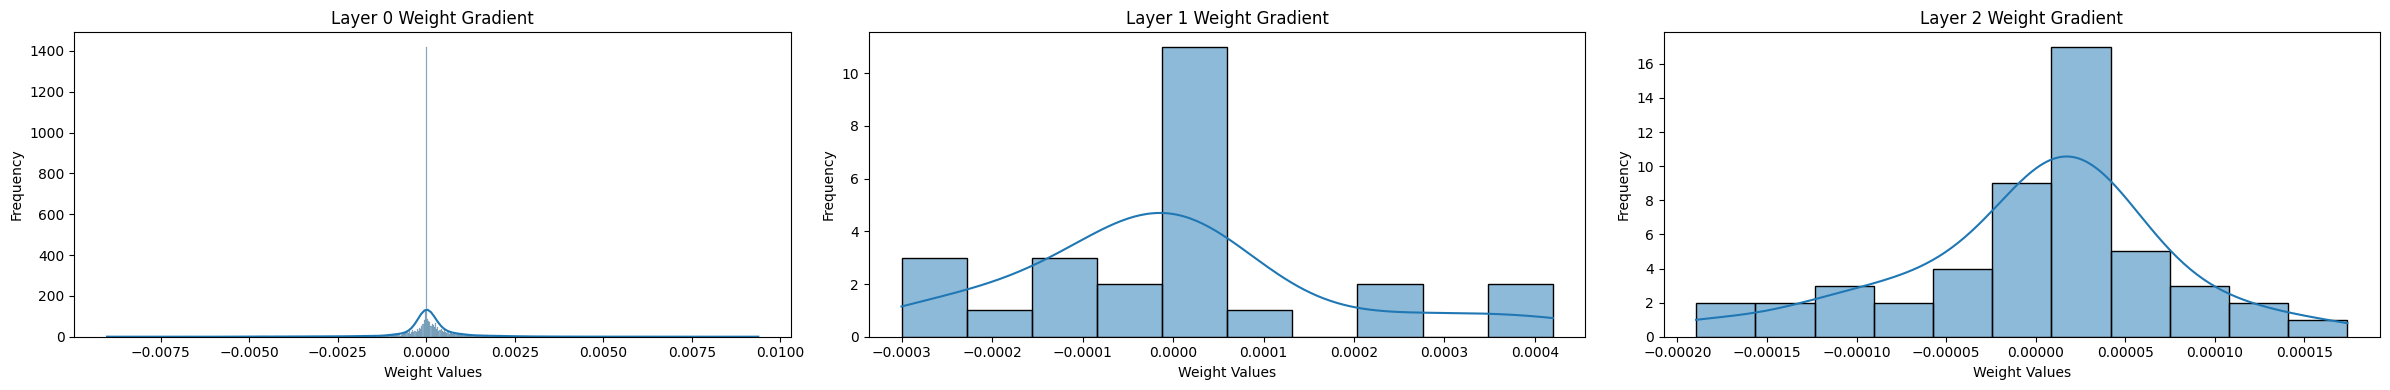

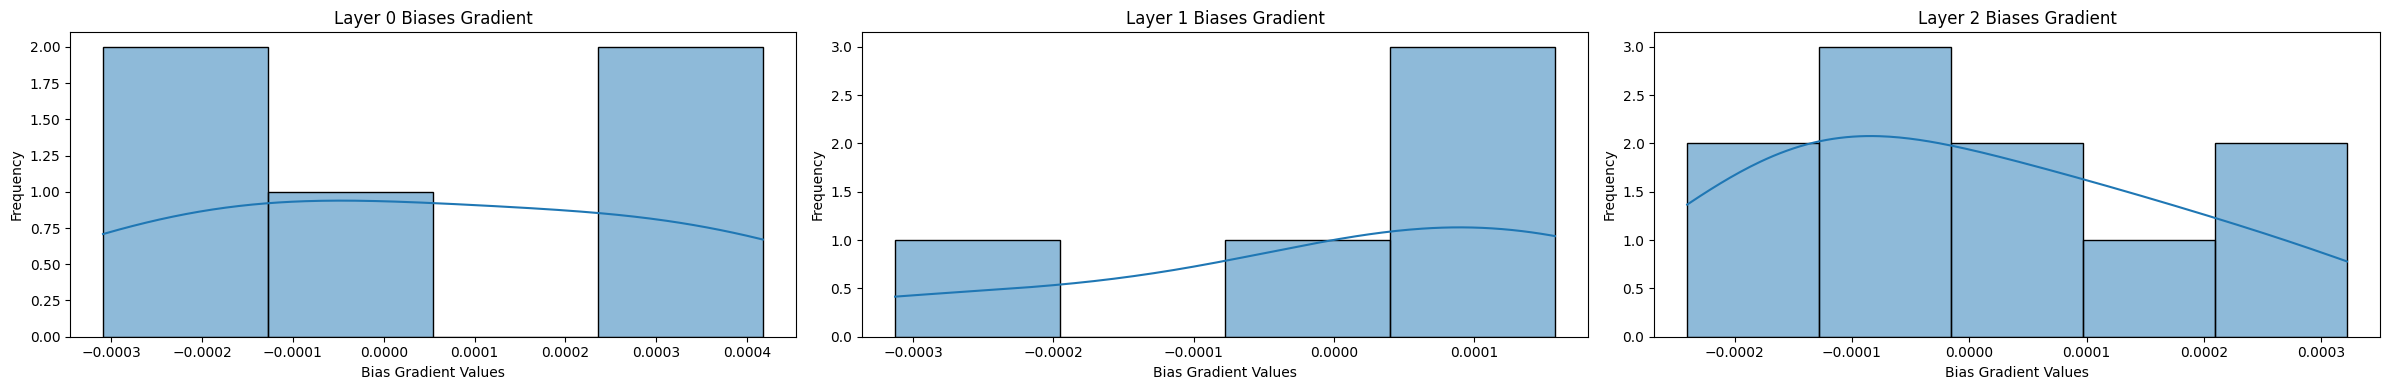

In [ ]:
model_lr_high.plot_weight_distribution()
model_lr_high.plot_biases_distribution()
model_lr_high.plot_gradient_weight_distribution()
model_lr_high.plot_gradient_biases_distribution()

## Test Pengaruh Weight Initialization

In [ ]:
def run_init_experiment(init_method):
    model = FFNN(
        loss='mse',
        batch_size=200,
        learning_rate=0.01,
        epochs=100,
        verbose=1
    )

    model.build_layers(
        Layer(n_neurons=2, init=init_method, activation='linear'),
        Layer(n_neurons=2, init=init_method, activation='relu'),
        Layer(n_neurons=2, init=init_method, activation='tanh'),
        Layer(n_neurons=2, init=init_method, activation='softmax'),
        Layer(n_neurons=2, init=init_method, activation='leaky_relu'),
        Layer(n_neurons=2, init=init_method, activation='elu'),
        Layer(n_neurons=10, init=init_method, activation='sigmoid')
    )

    model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred_labels == y_test)

    return model, accuracy, y_pred_labels

# ------------------------ Run Semua Init ----------------------------
initializations = [
    'zero', 
    'uniform', 
    'normal', 
    'xavier_uniform', 
    'xavier_normal', 
    'he_normal', 
    'he_uniform'
]

init_results = {}

for init in initializations:
    print(f"\n🚀 Running for initialization method: {init}")
    model, acc, preds = run_init_experiment(init)

    init_results[init] = {
        "model": model,
        "accuracy": acc,
        "preds": preds
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Predictions: {preds[:10]}")
    print(f"Target: {y_test[:10]}")

    print(f"\n📈 Loss Curve for init={init}")
    model.plot_training_loss()
    plt.show()

    print(f"\n⚖️ Weight Distribution for init={init}")
    model.plot_weight_distribution()
    plt.show()

    print(f"\n🌀 Gradient Distribution for init={init}")
    model.plot_biases_distribution()
    plt.show()

## FFNN - Scratch (Basic) vs MLPClassifier - Library Sklearn

In [ ]:
def run_scratch_ffnn():
    model = FFNN(
        loss='cce',
        batch_size=200,
        learning_rate=0.01,
        epochs=100,
        verbose=1
    )

    model.build_layers(
        Layer(n_neurons=4, init='he_uniform', activation='relu'),
        Layer(n_neurons=3, init='he_uniform', activation='relu'),
        Layer(n_neurons=2, init='he_uniform', activation='relu'),
        Layer(n_neurons=10, init='he_uniform', activation='relu')
    )

    model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

    y_pred = model.predict(X_test)
    y_pred_labels = y_pred  # sudah 1D, berisi label prediksi
    accuracy = np.mean(y_pred_labels == y_test)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Predictions: {y_pred_labels[:10]}")
    print(f"Target: {y_test[:10]}")
    return model, accuracy, y_pred_labels

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

def run_sklearn_mlp():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    mlp = MLPClassifier(
        hidden_layer_sizes=(4, 3, 2),
        activation='relu',
        solver='sgd',
        learning_rate_init=0.01,
        max_iter=100,
        batch_size=200,
        verbose=True,
        random_state=42
    )

    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)
    print(f"Sklearn MLPClassifier Accuracy: {accuracy:.4f}")
    return mlp, accuracy, y_pred

In [ ]:
# Scratch FFNN
run_scratch_ffnn()

# Sklearn MLPClassifier
mlp_model, mlp_acc, mlp_preds = run_sklearn_mlp()

In [ ]:
print("Sklearn MLPClassifier Accuracy:", mlp_acc)
print("Predictions (Sklearn):", mlp_preds[:10])
print("Target:", y_test[:10])

## Fungsi Aktivasi

In [ ]:
def run_activation_experiment(activation_function):
    model = FFNN(
        loss='cce',
        batch_size=200,
        learning_rate=0.01,
        epochs=100,
        verbose=1
    )

    model.build_layers(
        Layer(n_neurons=64, init='he_uniform', activation=activation_function),
        Layer(n_neurons=64, init='he_uniform', activation=activation_function),
        Layer(n_neurons=10, init='he_uniform', activation=activation_function)
    )

    model.fit(X_train, y_train, X_val=X_val, y_val=y_val)

    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)

    return model, accuracy, y_pred


# ------------------------ Run Semua Aktivasi ----------------------------

activation_functions = [
    'linear',
    'relu',
    'leaky_relu',
    'elu',
    'sigmoid',
    'tanh'
]

activation_results = {}

for act in activation_functions:
    print(f"\n🚀 Running for activation function: {act}")
    model, acc, preds = run_activation_experiment(act)

    activation_results[act] = {
        "model": model,
        "accuracy": acc,
        "preds": preds
    }

    print(f"Accuracy: {acc:.4f}")
    print(f"Predictions: {preds[:10]}")
    print(f"Target: {y_test[:10]}")

    print(f"\n📈 Loss Curve for activation={act}")
    model.plot_training_loss()
    plt.show()

    print(f"\n⚖️ Weight Distribution for activation={act}")
    model.plot_weight_distribution()
    plt.show()

    print(f"\n🌀 Gradient Distribution for activation={act}")
    model.plot_biases_distribution()
    plt.show()